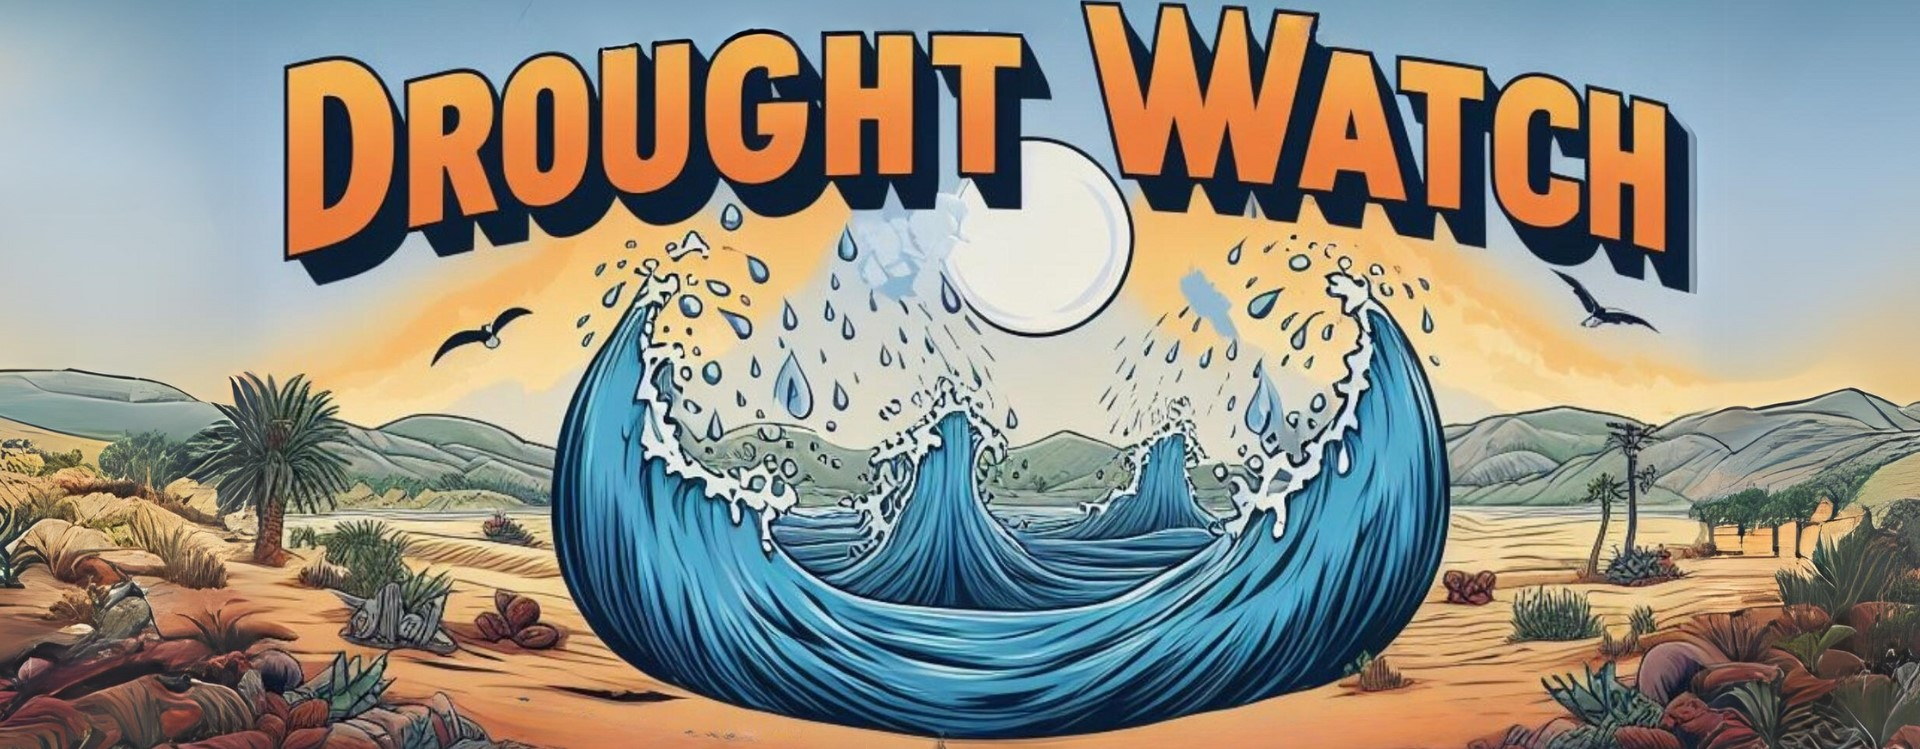



---



# Informe Técnico "Drought Watch"

Integrantes:
* Juan Muñoz
* Javier Jorquera

Docente:
* Francia Berna

Sección: **BIY7121 -001D**

# Caso Mineria de datos

CONTEXTO CASO

El caso se centra en Australia, un país extenso con diversos climas que van desde desérticos y semiáridos en el oeste hasta tropicales en el norte y templados en el sureste y suroeste . Australia se divide en seis estados y dos territorios continentales, con ciudades importantes como Sídney, Melbourne, Brisbane, Perth y Adelaide . El país tiene una gran diversidad climática, con inviernos suaves y veranos cálidos, y experimenta fenómenos naturales extremos como sequías, inundaciones, ciclones tropicales e incendios forestales . En cuanto a recursos naturales y minería, Australia es uno de los principales productores y exportadores mundiales de minerales y productos energéticos, con el sector minero representando alrededor del 10% del PIB .

Además, se proporciona un conjunto de datos de observaciones meteorológicas diarias de múltiples ubicaciones en Australia para que los estudiantes exploren y apliquen técnicas de minería de datos. Este conjunto de datos incluye variables como la temperatura mínima y máxima, la cantidad de lluvia registrada, la evaporación, las horas de sol, la dirección y velocidad del viento, entre otros.

En este caso, la data corresponde a un archivo CSV con 142.193 filas, cada una correspondiente a un dato en especifico sobre el tiempo. El archivo contiene 24 columnas correspondientes a variables que describen los datos meteorologicos.



---



# Fase 1: Business Understanding

## Objetivo


El objetivo de la Empresa "Drought Watch" es minimizar, prevenir y mitigar el impacto de las sequías en la agricultura australiana mediante la predicción temprana y precisa de las sequías.

## KPIs

* Tiempo de anticipación antes de una alerta: Determinar el tiempo promedio con el que el modelo puede predecir una sequía antes de que ocurra, lo que permitiría tomar medidas preventivas.

* Cobertura geográfica: Medir el porcentaje de regiones o ubicaciones en Australia donde el modelo puede realizar  las alertas de sequía con anticipación.

* Tendencia de Temperatura: Calculo de la media anual a lo largo del tiempo. para así con datos historicos comparar y medir una posible sequía según una referencia pasada.

* Reducción en Pérdida de Cosechas: Porcentaje de reducción en pérdida de cosechas en áreas donde se implementaron medidas preventivas basadas en las alertas.

---


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline {Ubicación} & \text {Ubicación de la estación meteorológica.}  \\
\hline \text{ MinTemp} & \text { Temperatura mínima en grados Celsius.} \\
\hline \text{ MaxTemp} & \text { temperatura máxima en grados Celsius.} \\
\hline \text{ Lluvia} & \text { Cantidad de lluvia registrada ese día en mm.} \\
\hline \text{ Evaporacion} & \text { Evaporación (mm) en 24 horas.} \\
\hline \text{ Sol} & \text { Número de horas de sol brillante en el día.} \\
\hline \text{ DirRafaga:} & \text { Dirección de la ráfaga de viento más fuerte en 24 horas.} \\
\hline \text{ VelRafaga} & \text { Velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas.} \\
\hline \text{ Dir9am} & \text { Dirección del viento a las 9am.} \\
\hline \text{ Dir3pm} & \text { Dirección del viento a las 3pm.} \\
\hline \text{ Vel9am} & \text { Velocidad (km/hr) del viento a las 9am.} \\
\hline \text{ Vel3pm} & \text { Velocidad (km/hr) del viento a las 3pm.} \\
\hline \text{ Hum9am} & \text { Porcentaje de humedad a las 9am.} \\
\hline \text{ Hum3pm} & \text { Porcentaje de humedad a las 3pm.} \\
\hline \text{ Pres9am} & \text { Presión atmosférica (hpa) a nivel del mar a las 9am.} \\
\hline \text{ Pre3pm} & \text { Presión atmosférica (hpa) a nivel del mar a las 3pm.} \\
\hline \text{ Nub9am} & \text { Fración del cielo cubierto por nubes a las 9am. Se mide en "octavos", de manera que un valor 0 indica cielo totalmente despejado y 8, cielo totalmente cubierto.} \\
\hline \text{  Nub3pm} & \text {Fración del cielo cubierto por nubes a las 3pm. Se mide en "octavos", de manera que un valor 0 indica cielo totalmente despejado y 8, cielo totalmente cubierto.} \\
\hline \text{ Temp9am} & \text { Temperatura en grados celsius a las 9am.} \\
\\
\hline \text{ Temp3pm} & \text { Temperatura en grados celsius a las 3pm.} \\
\\
\hline \text{ LluviaHoy} & \text { Variable indicadora que toma el valor 1 si la precipitación en mm. en las últimas 24 hrs. excede 1 mm. y 0 si no.} \\\\
\hline \text{ RISK_MM} & \text { La cantidad de lluvia. Una especie de medida del "riesgo".} \\\\
\hline \text{ LluviaMan} & \text { Variable indicadora que toma el valor 1 si al día siguiente llovió y 0 si no.} \\
\end{array}
\end{aligned}
$$


---



## ¿Para qué necesitamos estos datos?


Se utilizarán estos datos para medir los niveles de temperatura, humedad, presión atmosférica y los días de lluvia, para así crear modelos y poder predecir una sequía en un tiempo determinado, se separán los datos por año, para así verificar patrones repetitivos.

Datos de interés:


* MinTemp y MaxTemp: Las temperaturas extremas, tanto mínimas como máximas, pueden influir en la evaporación y la sequedad del suelo, lo que contribuye a las condiciones de sequía.

* Temp9am y Temp3pm: Estas variables pueden proporcionar información adicional sobre los patrones de temperatura diarios, que también pueden estar relacionados con las condiciones de sequía.

* RainTomorrow: Esta es probablemente la variable objetivo principal, ya que indica si habrá o no precipitaciones al día siguiente. Predecir correctamente los días sin lluvia puede ser clave para anticipar las sequías.




## Datos requeridos para nuestro análisis

*   Rain Today/Tomorrow
*   Evaporation
*   Location
*   Date
*   Max/Min Temp
*   Temp 9am/3pm
*   Rainfall   
   




---



# Fase 2: Data Understanding

## Datos historicos de las temperaturas de australia según la web

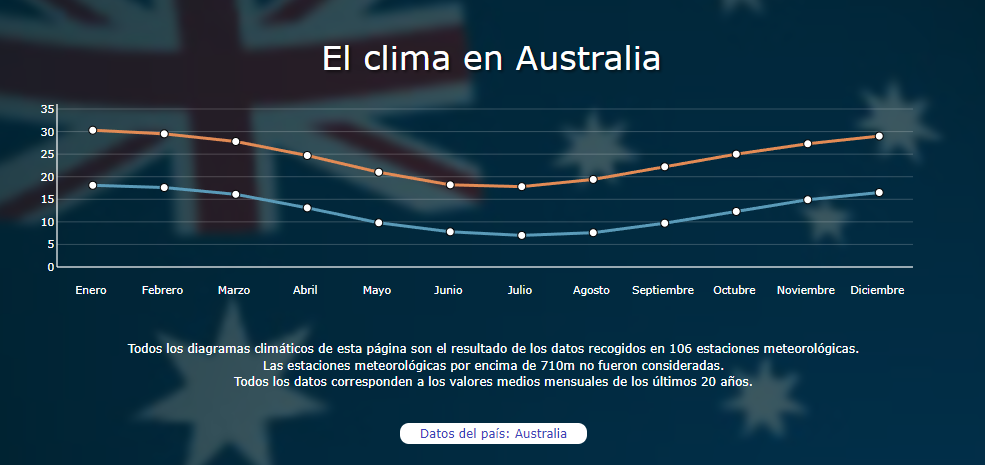

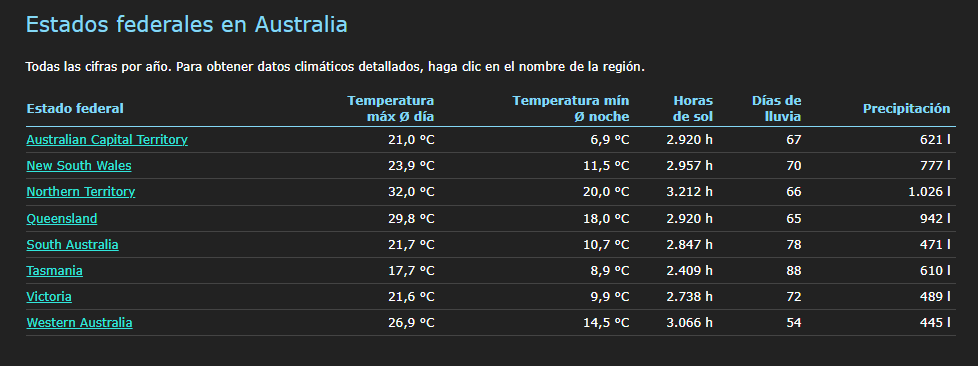

Fuente: https://www.datosmundial.com/oceania/australia/clima.php

## Montaje y carga de librerías

In [ ]:
import numpy as np # Programación vectorial
import matplotlib.pyplot as plt # Visualización
import pandas as pd # Estructura y manipulación de datos
import seaborn as sns
import folium
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from folium.plugins import HeatMap
from datetime import datetime
from scipy import stats



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---

## Desglose de los datos

A continuación importaremos el la base de datos y mostraremos las 3 primeras columnas con los datos

Siguiendo el código veremos primero la cantidad total de datos que este contiene además aplicaremos un “.info” para saber qué tipo de datos tiene cada columna

In [ ]:
path= "/content/drive/MyDrive/Séptimo semestre/Minería de datos/Proyecto semestral/csv/weatherAUS.csv"
dw=pd.read_csv(path, sep=',')
#dw.head(5)

---

Existen 142193 filas y 24 columnas con datos.



In [ ]:
dw.shape

(142193, 24)

In [ ]:
dw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

---

## Análisis de datos númericos

Ocuparemos el siguiente código para obtener el análisis de datos de los datos numéricos de la base de datos este contiene el conteo, el promedio, la desviación estándar, el mínimo, distintos percentiles y el máximo

In [ ]:
dw.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


### Descripción "Date"

Identificamos la cantidad de años que hay en el dataset con fecha de inicio '01-11-2007' y fin '25-16-2017'



In [ ]:
# Asegurándonos de que 'Date' está en formato datetime
dw['Date'] = pd.to_datetime(dw['Date'])
# Encontrando la fecha mínima y máxima en el DataFrame
min_date = dw['Date'].min()
max_date = dw['Date'].max()
print('Primera fecha', min_date,'Última fecha:', max_date)

# Fechas
start_date = datetime(2007, 11, 1)
end_date = datetime(2017, 6, 25)
# Calculo
difference = end_date - start_date
years = difference.days / 365.25
print('Años:', years)


Primera fecha 2007-11-01 00:00:00 Última fecha: 2017-06-25 00:00:00
Años: 9.648186173853524


---

### Temperatura máxima registrada en el dataset

In [ ]:
# Encontrar la fila con la temperatura máxima
max_temp_row = dw.loc[dw['MaxTemp'].idxmax()]

print(f"La temperatura máxima registrada es: {max_temp_row['MaxTemp']}°C")
print(f"Ubicación: {max_temp_row['Location']}")
print(f"Fecha: {max_temp_row['Date']}")


La temperatura máxima registrada es: 48.1°C
Ubicación: Woomera
Fecha: 2011-01-25 00:00:00


###La máxima temperatura mínima

In [ ]:
# valor máximo de 'MinTemp'
max_min_temp_idx = dw['MinTemp'].idxmax()

# Acceder a la fila correspondiente para obtener la temperatura, fecha y ubicación
max_min_temp_row = dw.loc[max_min_temp_idx]

print(f"La máxima temperatura mínima registrada fue de {max_min_temp_row['MinTemp']}°C")
print(f"Ubicación: {max_min_temp_row['Location']}")
print(f"Fecha: {max_min_temp_row['Date']}")


La máxima temperatura mínima registrada fue de 33.9°C
Ubicación: Adelaide
Fecha: 2009-01-29 00:00:00


---

### Distribución de Temperaturas

Para entender cómo varían las temperaturas, calculamos estadísticas descriptivas para "MaxTemp" y "MinTemp".

In [ ]:
print(dw[['MaxTemp', 'MinTemp']].describe())

             MaxTemp        MinTemp
count  141871.000000  141556.000000
mean       23.226784      12.186400
std         7.117618       6.403283
min        -4.800000      -8.500000
25%        17.900000       7.600000
50%        22.600000      12.000000
75%        28.200000      16.800000
max        48.100000      33.900000


Podemos ver que en la máxima temperatura de la mínima temperatura es de 33.9°C, por lo que consideramos que podria ser un valor átipico que quizás mas adelante deberamos eliminar

### Análisis de Precipitaciones Sidney

A continuación analizaremos el promedio mensual y anual de las precipitaciones (Rainfall) el cual nos ayuda a identificar patrones o meses con baja o alta precipitación.

<ipython-input-12-a2268a4289ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['Date'] = pd.to_datetime(city_data['Date'])


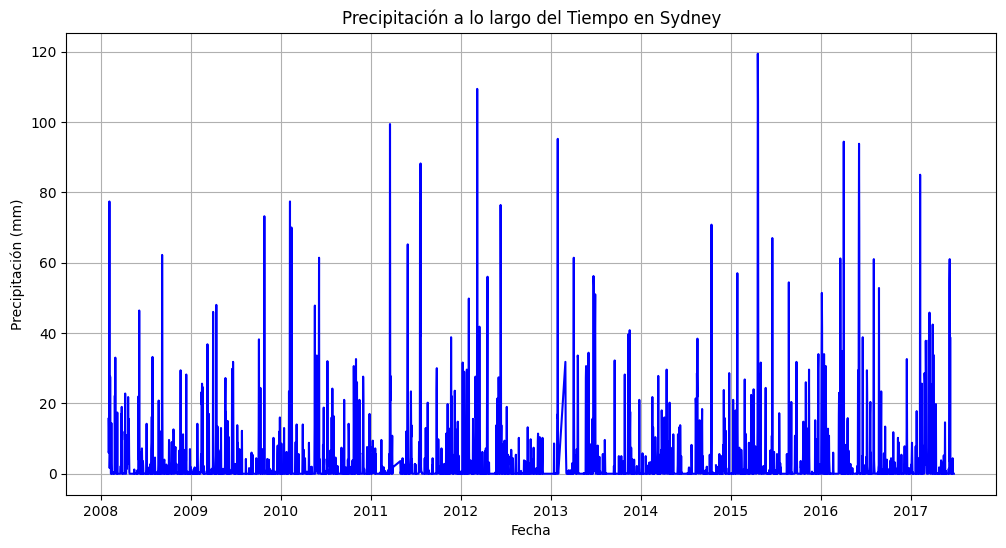

In [ ]:
# Filtrar datos para una ciudad específica
city_data = dw[dw['Location'] == 'Sydney']

# Convertir la columna Date a formato de fecha
city_data['Date'] = pd.to_datetime(city_data['Date'])

# Gráfico de Líneas de Precipitación a lo largo del Tiempo
plt.figure(figsize=(12, 6))
plt.plot(city_data['Date'], city_data['Rainfall'], color='blue')
plt.title('Precipitación a lo largo del Tiempo en Sydney')
plt.xlabel('Fecha')
plt.ylabel('Precipitación (mm)')
plt.grid(True)
plt.show()


Este gráfico de líneas muestra cómo las precipitaciones cambian año a año , permitiendo observar los años  más secos y patrones que pueden ser indicativos de riesgo de sequía. Como se puede observar en octubre entre los años 2012 y 2015 en octubre están las precipitaciones más altas en Sidney

---


<ipython-input-13-0dfc6fc9a19f>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=dw, x='Month', y='MinTemp', label='MinTemp', ci=None)
<ipython-input-13-0dfc6fc9a19f>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=dw, x='Month', y='MaxTemp', label='MaxTemp', ci=None)


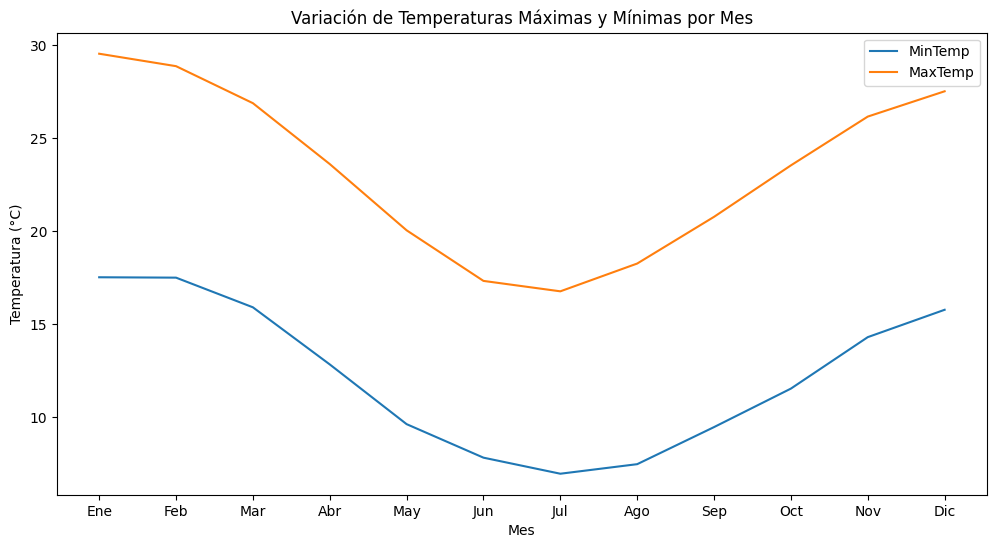

In [ ]:
# Suponiendo que 'Date' y 'MinTemp'/'MaxTemp' están en el formato correcto
dw['Month'] = dw['Date'].dt.month

plt.figure(figsize=(12, 6))
sns.lineplot(data=dw, x='Month', y='MinTemp', label='MinTemp', ci=None)
sns.lineplot(data=dw, x='Month', y='MaxTemp', label='MaxTemp', ci=None)
plt.title('Variación de Temperaturas Máximas y Mínimas por Mes')
plt.xlabel('Mes')
plt.ylabel('Temperatura (°C)')
plt.xticks(ticks=np.arange(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend()
plt.show()


Se puede visualizar que en temporadas de invierno (mayo- agosto) se registraron la temperaturas más bajas del dataset.

###Análisis de Evaporación y Humedad

Examinaremos la evaporación y humedad el cual puede ofrecer insights sobre la pérdida de agua y las condiciones de humedad.

In [ ]:
print(dw[['Evaporation', 'Humidity9am']].describe())


        Evaporation    Humidity9am
count  81350.000000  140419.000000
mean       5.469824      68.843810
std        4.188537      19.051293
min        0.000000       0.000000
25%        2.600000      57.000000
50%        4.800000      70.000000
75%        7.400000      83.000000
max      145.000000     100.000000


### Relación entre Evaporación y Humedad a las 9am en Días Sin Lluvia

A continuación visualizaremos la relación entre la evaporación y la humedad en días sin lluvia para identificar condiciones que pueden predisponer a una sequía.

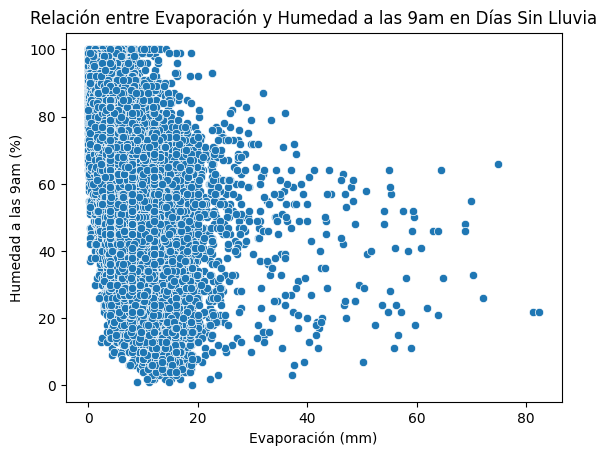

In [ ]:
sns.scatterplot(data=dw[dw['RainToday'] == 'No'], x='Evaporation', y='Humidity9am')
plt.title('Relación entre Evaporación y Humedad a las 9am en Días Sin Lluvia')
plt.xlabel('Evaporación (mm)')
plt.ylabel('Humedad a las 9am (%)')
plt.show()


Este grafico nos muestra que a  medida que disminuye la humedad a las 9 a.m, la evaporación tiende a aumentar. Hay una tendencia general a disminuir la evaporación a medida que aumenta la humedad a las 9 a.m., con algunas excepciones.
En conclusión, el gráfico sugiere que una humedad más alta a las 9 a. m. se asocia con tasas de evaporación más bajas, y una humedad más baja a las 9 a. m. se asocia con tasas de evaporación más altas.


---


###Identificación de Valores Atípicos

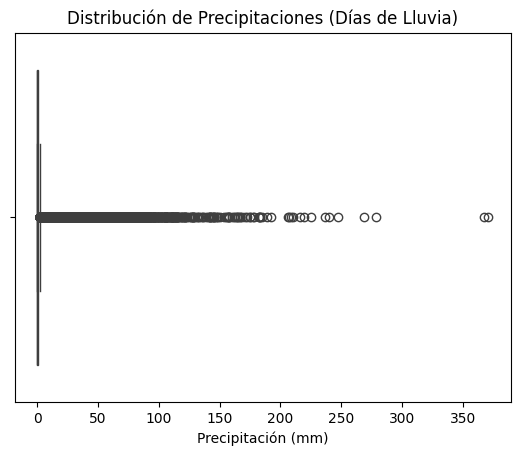

In [ ]:
sns.boxplot(data=dw, x='Rainfall')
plt.title('Distribución de Precipitaciones (Días de Lluvia)')
plt.xlabel('Precipitación (mm)')
plt.show()


Este gráfico permite identificar días con precipitaciones anormalmente altas, que podrían ser errores o eventos extremos (como ciclones) en donde consideraremos de manera diferente en el análisis.

### Variación temperatura en las ciudades de Australia

### Lista de ciudades en el dataset

In [ ]:
num_localidades = dw['Location'].nunique()
lista_ciudades = dw['Location'].unique().tolist()
print("Lista de",num_localidades , "ciudades:", lista_ciudades)


Lista de 49 ciudades: ['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns', 'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine', 'Uluru']


### Creación de diccionario con las 49 ciudades con sus respectivas coordenadas

In [ ]:
ubicaciones_coords = {
    "Albury": (-36.0737, 146.9135),
    "BadgerysCreek": (-33.8761, 150.7442),
    "Cobar": (-31.4983, 145.8344),
    "CoffsHarbour": (-30.2963, 153.1157),
    "Moree": (-29.4658, 149.8409),
    "Newcastle": (-32.9267, 151.7789),
    "NorahHead": (-33.2817, 151.5679),
    "NorfolkIsland": (-29.0408, 167.9547),
    "Penrith": (-33.7511, 150.6942),
    "Richmond": (-33.5995, 150.7522),
    "Sydney": (-33.8688, 151.2093),
    "SydneyAirport": (-33.9399, 151.1753),
    "WaggaWagga": (-35.1082, 147.3598),
    "Williamtown": (-32.815, 151.8428),
    "Wollongong": (-34.4278, 150.8931),
    "Canberra": (-35.2809, 149.1300),
    "Tuggeranong": (-35.4228, 149.0888),
    "MountGinini": (-35.5294, 148.7723),
    "Ballarat": (-37.5622, 143.8503),
    "Bendigo": (-36.7570, 144.2794),
    "Sale": (-38.1118, 147.0624),
    "MelbourneAirport": (-37.6690, 144.8410),
    "Melbourne": (-37.8136, 144.9631),
    "Mildura": (-34.2080, 142.1246),
    "Nhil": (-36.3333, 141.6503),
    "Portland": (-38.3463, 141.6042),
    "Watsonia": (-37.7110, 145.0830),
    "Dartmoor": (-37.9225, 141.2760),
    "Brisbane": (-27.4698, 153.0251),
    "Cairns": (-16.9186, 145.7781),
    "GoldCoast": (-28.0167, 153.4000),
    "Townsville": (-19.2583, 146.8169),
    "Adelaide": (-34.9285, 138.6007),
    "MountGambier": (-37.8247, 140.7838),
    "Nuriootpa": (-34.4694, 138.9939),
    "Woomera": (-31.1999, 136.8253),
    "Albany": (-35.0275, 117.8835),
    "Witchcliffe": (-34.0268, 115.1000),
    "PearceRAAF": (-31.6678, 116.0150),
    "PerthAirport": (-31.9403, 115.9672),
    "Perth": (-31.9505, 115.8605),
    "SalmonGums": (-32.9815, 121.6438),
    "Walpole": (-34.9777, 116.7338),
    "Hobart": (-42.8821, 147.3272),
    "Launceston": (-41.4332, 147.1441),
    "AliceSprings": (-23.6980, 133.8807),
    "Darwin": (-12.4634, 130.8456),
    "Katherine": (-14.4646, 132.2635),
    "Uluru": (-25.3444, 131.0369),
}

### Mapa interactivo con las temperaturas promedio por ciudad dentro del conjunto de datos

In [ ]:
# Calculamos el promedio de temperatura para cada ciudad
dw['PromedioTemp'] = (dw['MaxTemp'] + dw['MinTemp']) / 2

# Agregamos las coordenadas desde tu diccionario de ubicaciones
dw['Latitud'] = dw['Location'].apply(lambda x: ubicaciones_coords[x][0])
dw['Longitud'] = dw['Location'].apply(lambda x: ubicaciones_coords[x][1])

# Calculamos el promedio de temperatura para cada ubicación
promedio_temp_ciudad = dw.groupby('Location', as_index=False)['PromedioTemp'].mean()
promedio_temp_ciudad['Latitud'] = promedio_temp_ciudad['Location'].apply(lambda x: ubicaciones_coords[x][0])
promedio_temp_ciudad['Longitud'] = promedio_temp_ciudad['Location'].apply(lambda x: ubicaciones_coords[x][1])


In [ ]:
import plotly.express as px

fig = px.scatter_geo(promedio_temp_ciudad,
                     lat='Latitud',
                     lon='Longitud',
                     size='PromedioTemp',  # El tamaño de la burbuja representa la temperatura promedio
                     color='PromedioTemp',  # El color también representa la temperatura
                     hover_name='Location',  # Muestra el nombre de la ciudad al pasar el cursor
                     projection='natural earth',  # Tipo de proyección del mapa
                     title='Temperaturas Promedio en Australia por Ciudad')

fig.show()


En este grafico podemos concluir  que en las localidades de Khaterine y Darwin contienen un mayor indice de temperaturas con un promedio de 27 grados en comparacion con otras localidades que no superan los 20 grados en promedio

Como se pueden ver en los dos gráficos, Darwin mantiene temperaturas muy altas en comparación a otras ciudades de la región.

### Matriz de correlación

En esta línea veremos la matriz de correlación para poder resumir los datos además de comprender la relación entre variables númericas y hacer una toma de decisiones.

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow,Month,PromedioTemp,Latitud,Longitud
MinTemp,1.000000,0.734707,0.106710,-0.233009,0.008380,-0.458685,-0.468864,0.902217,0.707110,0.130864,0.084065,-0.205215,0.924196,0.511419,0.018650
MaxTemp,0.734707,1.000000,-0.113162,-0.503521,-0.504637,-0.340922,-0.436449,0.885665,0.984304,-0.069287,-0.158564,-0.165090,0.937603,0.465036,-0.084008
Rainfall,0.106710,-0.113162,1.000000,0.275666,0.308128,-0.194811,-0.138628,-0.008435,-0.119176,0.315966,0.287203,-0.021869,-0.008808,0.053300,0.027474
Humidity9am,-0.233009,-0.503521,0.275666,1.000000,0.665917,0.142010,0.190084,-0.468775,-0.498176,0.206567,0.257820,-0.089759,-0.401870,-0.197656,0.116799
Humidity3pm,0.008380,-0.504637,0.308128,0.665917,1.000000,-0.026133,0.054260,-0.215607,-0.554228,0.377051,0.446571,-0.017952,-0.277845,-0.073738,0.132692
Pressure9am,-0.458685,-0.340922,-0.194811,0.142010,-0.026133,1.000000,0.961478,-0.430731,-0.296056,-0.201402,-0.244516,0.038598,-0.426974,-0.138716,0.023739
Pressure3pm,-0.468864,-0.436449,-0.138628,0.190084,0.054260,0.961478,1.000000,-0.478576,-0.399183,-0.199941,-0.223520,0.028894,-0.485840,-0.211955,0.020155
Temp9am,0.902217,0.885665,-0.008435,-0.468775,-0.215607,-0.430731,-0.478576,1.000000,0.859091,0.043853,-0.025243,-0.137217,0.959774,0.560079,-0.047742
Temp3pm,0.707110,0.984304,-0.119176,-0.498176,-0.554228,-0.296056,-0.399183,0.859091,1.000000,-0.098810,-0.192531,-0.176394,0.915058,0.463761,-0.080537
RISK_MM,0.130864,-0.069287,0.315966,0.206567,0.377051,-0.201402,-0.199941,0.043853,-0.098810,1.000000,0.638084,-0.023859,0.028148,0.053033,0.027383


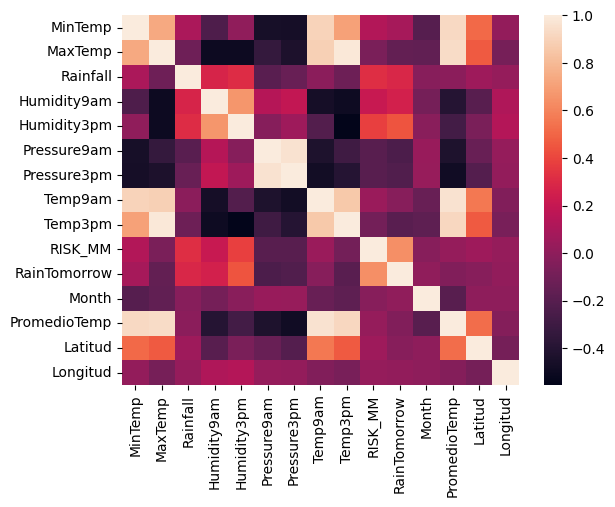

In [ ]:
corr = dwn.corr()
sns.heatmap(corr)
corr.style.background_gradient (cmap = 'RdYlGn')

---

# Fase 3: Data Preparation


##Limpieza datos relevantes




Crearemos un dataframe llamado "dwn" con las columas que nos sirven para la investigación

In [ ]:
dwn= dw.drop(['Sunshine','Evaporation','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm','Cloud9am', 'Cloud3pm',
              'WindGustDir', 'WindDir9am', 'WindDir3pm', 'WindDir9am', 'WindDir9am', 'WindDir9am',
              'RainToday', 'Humidity9am','Humidity3pm', 'Pressure9am','Pressure3pm','RISK_MM','RainTomorrow' ],axis=1)

In [ ]:
dwn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            142193 non-null  object 
 1   Location        142193 non-null  object 
 2   MinTemp         141556 non-null  float64
 3   MaxTemp         141871 non-null  float64
 4   Rainfall        140787 non-null  float64
 5   Temp9am         141289 non-null  float64
 6   Temp3pm         139467 non-null  float64
 7   Latitude        128704 non-null  float64
 8   Longitude       128704 non-null  float64
 9   RainfallBinary  142193 non-null  int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 10.8+ MB


In [ ]:
# Crear un diccionario de coordenadas
location_coords = {
    'Adelaide': (-34.9285, 138.6007),
    'Albany': (-35.027, 117.883),
    'Albury': (-36.0737, 146.9135),
    'AliceSprings': (-23.6980, 133.8807),
    'BadgerysCreek': (-33.92, 150.9804),
    'Ballarat': (-37.561, 143.8496),
    'Bendigo': (-36.757, 144.2794),
    'Brisbane': (-27.4705, 153.026),
    'Cairns': (-16.9186, 145.7781),
    'Canberra': (-35.2809, 149.1300),
    'Cobar': (-31.4982, 145.8381),
    'CoffsHarbour': (-30.2963, 153.1141),
    'Dartmoor': (-37.9167, 141.2833),
    'Darwin': (-12.4634, 130.8456),
    'GoldCoast': (-28.0167, 153.4),
    'Hobart': (-42.8821, 147.3272),
    'Launceston': (-41.4545, 147.1441),
    'Melbourne': (-37.8136, 144.9631),
    'Mildura': (-34.1855, 142.1627),
    'Moree': (-29.4667, 149.8333),
    'MountGambier': (-37.8313, 140.7798),
    'Newcastle': (-32.9283, 151.7817),
    'Nhil': (-36.3333, 141.65),
    'NorahHead': (-33.2815, 151.5693),
    'NorfolkIsland': (-29.0383, 167.9547),
    'Nuriootpa': (-34.4681, 138.9953),
    'PearceRAAF': (-31.6678, 116.0173),
    'Penrith': (-33.758, 150.705),
    'Perth': (-31.9505, 115.8605),
    'Portland': (-38.337, 141.6044),
    'Richmond': (-33.6, 150.75),
    'Sale': (-38.1053, 147.0642),
    'SalmonGums': (-32.98, 121.635),
    'Sydney': (-33.8688, 151.2093),
    'Townsville': (-19.2589, 146.8169),
    'Tuggeranong': (-35.4167, 149.0833),
    'Uluru': (-25.3444, 131.0369),
    'WaggaWagga': (-35.115, 147.369),
    'Walpole': (-34.977, 116.733),
    'Watsonia': (-37.7167, 145.0833),
    'Williamtown': (-32.7914, 151.8345),
    'Witchcliffe': (-34.0214, 115.1039),
    'Wollongong': (-34.4278, 150.8931),
    'Woomera': (-31.15, 136.8)
}

# Añadir columnas de latitud y longitud
dwn['Latitude'] = dwn['Location'].map(lambda loc: location_coords[loc][0] if loc in location_coords else np.nan)
dwn['Longitude'] = dwn['Location'].map(lambda loc: location_coords[loc][1] if loc in location_coords else np.nan)

# Verificar los cambios en el dataframe
print(dwn[['Location', 'Latitude', 'Longitude']].head())

  Location  Latitude  Longitude
0   Albury  -36.0737   146.9135
1   Albury  -36.0737   146.9135
2   Albury  -36.0737   146.9135
3   Albury  -36.0737   146.9135
4   Albury  -36.0737   146.9135


### Codificación de Variables Categóricas

Conversión de las variables RainToday y 'RainTomorrow' que son categóricas ('Yes', 'No') a una forma numérica (1, 0).

In [ ]:
# Binarizar la variable objetivo 'Rainfall'
dwn['RainfallBinary'] = np.where(dwn['Rainfall'] > 0, 1, 0)

In [ ]:
dwn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            142193 non-null  object 
 1   Location        142193 non-null  object 
 2   MinTemp         141556 non-null  float64
 3   MaxTemp         141871 non-null  float64
 4   Rainfall        140787 non-null  float64
 5   Temp9am         141289 non-null  float64
 6   Temp3pm         139467 non-null  float64
 7   Latitude        128704 non-null  float64
 8   Longitude       128704 non-null  float64
 9   RainfallBinary  142193 non-null  int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 10.8+ MB


In [ ]:
dwn.describe()

,MinTemp,MaxTemp,Rainfall,Temp9am,Temp3pm,RainTomorrow
count,141556.000000,141871.000000,140787.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,16.987509,21.687235,0.224181
std,6.403283,7.117618,8.465173,6.492838,6.937594,0.417043
min,-8.500000,-4.800000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,21.600000,26.400000,0.000000
max,33.900000,48.100000,371.000000,40.200000,46.700000,1.000000


---

### Cantidad de nulos por variable

In [ ]:
dwn.isna().sum()

Location         0
MinTemp        637
MaxTemp        322
Rainfall      1406
Temp9am        904
Temp3pm       2726
Latitude     13489
Longitude    13489
dtype: int64

---

##Imputación en los nulos y valores perdidos

###KNN


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from scipy import stats

# Identificar y recortar outliers. Aquí un ejemplo simple con z-scores.
z_scores = np.abs(stats.zscore(dwn.select_dtypes(include=[np.number])))
outliers = (z_scores >= 3).any(axis=1)
print(f"Número de filas con outliers: {outliers.sum()}")

# Mantener solo las filas sin ningún z-score extremo
dwn_filtered = dwn[~outliers]
print(f"Número de filas después de eliminar outliers: {len(dwn_filtered)}")

# Si después de filtrar hay menos datos, considera ajustar el umbral de z-scores
if len(dwn_filtered) < len(dwn) * 0.1:  # si se eliminó más del 90% de los datos
    z_scores = np.abs(stats.zscore(dwn.select_dtypes(include=[np.number])))
    outliers = (z_scores >= 3.5).any(axis=1)  # Ajustar el umbral
    dwn_filtered = dwn[~outliers]
    print(f"Número de filas después de ajustar el umbral y eliminar outliers: {len(dwn_filtered)}")

# Alternativamente, podrías recortar o limitar los valores extremos antes de la imputación.
# Por ejemplo, limitar los valores en el 1er y 99º percentil
for col in dwn_filtered.select_dtypes(include=[np.number]).columns:
    if col not in ['Latitude', 'Longitude']:  # No tocar latitud y longitud
        lower = dwn_filtered[col].quantile(0.01)
        upper = dwn_filtered[col].quantile(0.99)
        dwn_filtered[col] = np.clip(dwn_filtered[col], lower, upper)

# Guardar las columnas 'Location', 'Latitude', 'Longitude' y 'Date' antes de la imputación
location_col = dwn_filtered['Location']
latitude_col = dwn_filtered['Latitude']
longitude_col = dwn_filtered['Longitude']
date_col = dwn_filtered['Date']

# Seleccionar solo las columnas numéricas para la imputación, excepto 'Latitude' y 'Longitude'
numeric_cols = dwn_filtered.select_dtypes(include=[np.number]).drop(columns=['Latitude', 'Longitude'])

# Inicializar el KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

# Verificar si hay datos para imputar
if len(numeric_cols) > 0:
    # Aplicar el imputer al dataframe de solo columnas numéricas
    numeric_cols_imputed = pd.DataFrame(imputer.fit_transform(numeric_cols), columns=numeric_cols.columns)

    # Reintegrar las columnas 'Location', 'Latitude', 'Longitude' y 'Date' al dataframe imputado
    dwn_imputed = numeric_cols_imputed
    dwn_imputed['Location'] = location_col.values
    dwn_imputed['Latitude'] = latitude_col.values
    dwn_imputed['Longitude'] = longitude_col.values
    dwn_imputed['Date'] = date_col.values

    # Verificar los cambios en los datos
    print(dwn_imputed.isnull().sum())



Número de filas con outliers: 0
Número de filas después de eliminar outliers: 142193
MinTemp               0
MaxTemp               0
Rainfall              0
Temp9am               0
Temp3pm               0
RainfallBinary        0
Location              0
Latitude          13489
Longitude         13489
Date                  0
dtype: int64


### Random Forest Regressor

In [ ]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from scipy import stats

# Identificar y recortar outliers utilizando z-scores con un umbral más alto
z_scores = np.abs(stats.zscore(dwn.select_dtypes(include=[np.number])))
threshold = 3  # Puedes ajustar este valor si elimina demasiados datos
print(f"Porcentaje de filas iniciales: {len(dwn)}")

dwn_filtered = dwn[(z_scores < threshold).all(axis=1)]
print(f"Porcentaje de filas después de filtrar con z-scores: {len(dwn_filtered)}")

if len(dwn_filtered) == 0:
    print("Demasiadas filas eliminadas. Ajustando el umbral o método de outliers.")
    dwn_filtered = dwn

# Limitar los valores en el 1er y 99º percentil para recortar outliers
for col in dwn_filtered.select_dtypes(include=[np.number]).columns:
    lower = dwn_filtered[col].quantile(0.01)
    upper = dwn_filtered[col].quantile(0.99)
    dwn_filtered[col] = np.clip(dwn_filtered[col], lower, upper)

# Inicializar el IterativeImputer con RandomForestRegressor
imputer_rf = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=42), random_state=42)

# Aplicar el imputer al dataframe
dwn_imputed = pd.DataFrame(imputer_rf.fit_transform(dwn_filtered), columns=dwn_filtered.columns)

# Verificar los cambios en los datos
print(dwn_imputed.isnull().sum())

# Opcional: Verificar si todavía hay valores extremos
#print(dwn_imputed.describe())


###Mapa de correlación con los datos imputados por metodo "KNN"

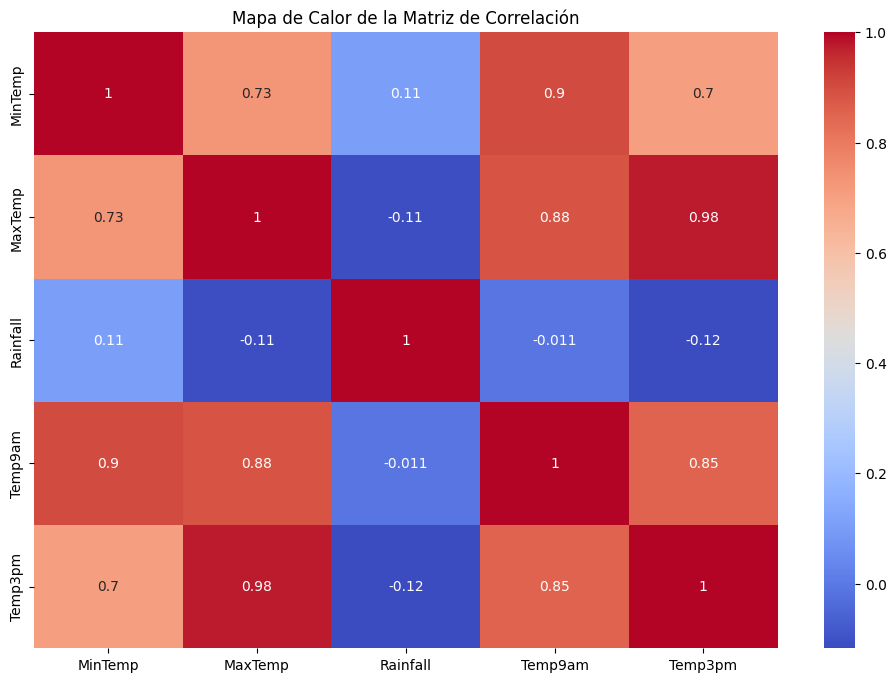

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Eliminar las columnas específicas
dwn_filtered = dwn_imputed.drop(columns=['RainfallBinary', 'Location', 'Latitude', 'Longitude', 'Date'])

# Calcular la matriz de correlación
corr_matrix = dwn_filtered.corr()

# Mostrar el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()


* Hay una correlación (0.88) entre Temp9am y MaxTemp esto quiere decir que a medida que aumenta la temperatura a las 9 a.m., es muy probable que la temperatura máxima del día también sea alta, y viceversa.

* Hay una correlación (0.74) entre MinTemp y MaxTemp, esto quiere decir que cuando la temperatura mínima diaria aumenta, la temperatura máxima diaria también tiende a aumentar, y viceversa.

* Hay una correlación (-0.56) entre Temp3pm y Humidity3pm  , esto quiere decir que a medida que aumenta la temperatura a las 3 p.m., tiende a disminuir la humedad a la misma hora.

---

## Identificación y Tratamiento de Valores Atípicos

### Rainfall


Los valores atípicos pueden afectar el rendimiento del modelo. Aquí, reemplazaremos los valores mayores a 300 por la media

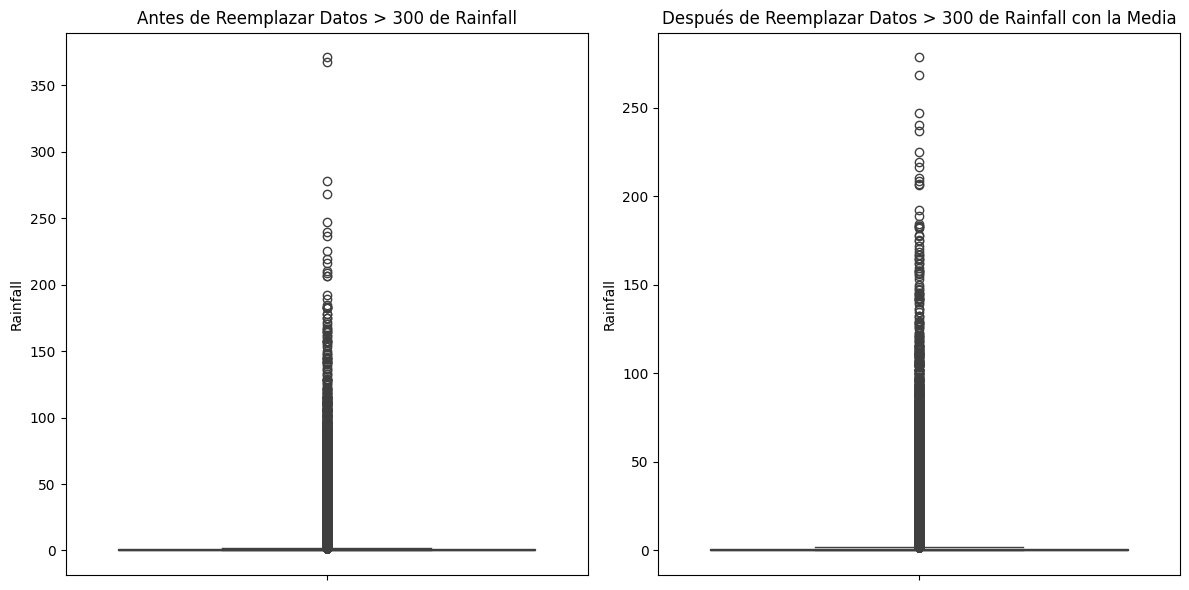

In [ ]:
# Calcular la media de 'Rainfall' excluyendo los valores por encima de 300
mean_rainfall = dwn[dwn['Rainfall'] <= 300]['Rainfall'].mean()

# Reemplazar valores de 'Rainfall' por encima de 300 con la media calculada
dwn_imputed = dw.copy()
dwn_imputed.loc[dwn_imputed['Rainfall'] > 300, 'Rainfall'] = mean_rainfall

# Gráfico de caja para 'Rainfall' después de reemplazar datos por encima de 300 con la media
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=dw['Rainfall'])
plt.title('Antes de Reemplazar Datos > 300 de Rainfall')

plt.subplot(1, 2, 2)
sns.boxplot(y=dwn_imputed['Rainfall'])
plt.title('Después de Reemplazar Datos > 300 de Rainfall con la Media')

plt.tight_layout()
plt.show()


---

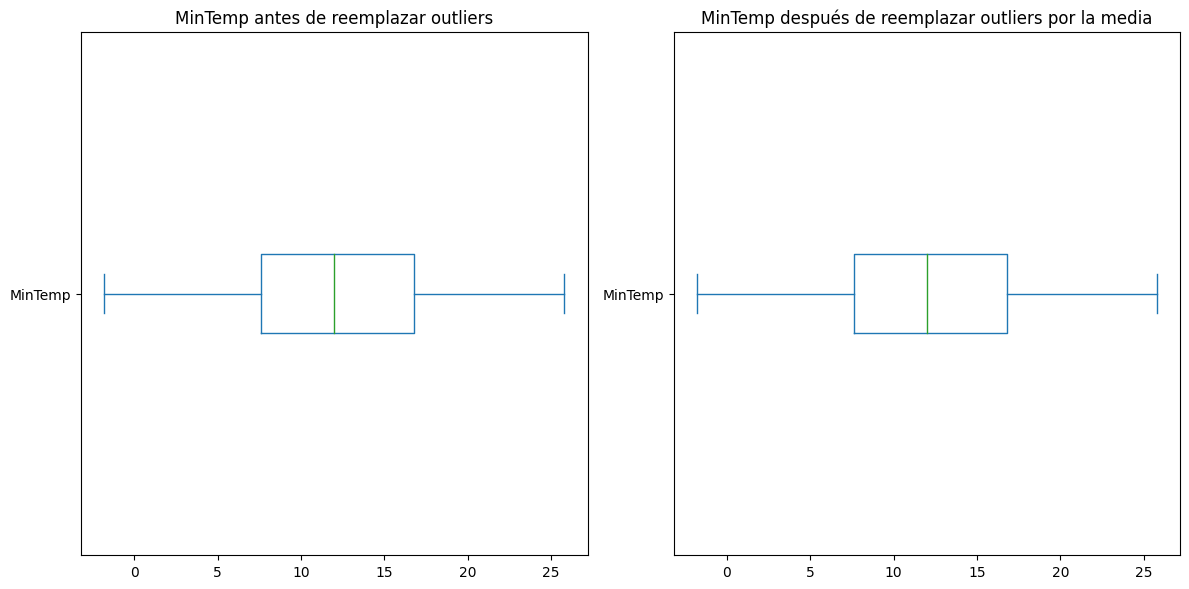

In [ ]:
# Calcular la media de 'MinTemp' dentro de los límites esperados
mean_mintemp_within_limits = dwn[(dwn['MinTemp'] >= -6.9) & (dwn['MinTemp'] <= 27)]['MinTemp'].mean()

# Reemplazar valores de 'MinTemp' fuera de los límites con la media calculada
dwn_imputed = dwn.copy()
dwn_imputed.loc[dwn_imputed['MinTemp'] < -6.9, 'MinTemp'] = mean_mintemp_within_limits
dwn_imputed.loc[dwn_imputed['MinTemp'] > 31.5 , 'MinTemp'] = mean_mintemp_within_limits

# Gráfico de caja para 'MinTemp' antes de reemplazar valores fuera de límites
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
dwn['MinTemp'].plot.box(vert=False, whis=1.5)
plt.title('MinTemp antes de reemplazar outliers')

# Gráfico de caja para 'MinTemp' después de reemplazar valores fuera de límites
plt.subplot(1, 2, 2)
dwn_imputed['MinTemp'].plot.box(vert=False, whis=1.5)
plt.title('MinTemp después de reemplazar outliers por la media')

plt.tight_layout()
plt.show()


### MinTemp

En este gráfico mostramos el antes y despues de reemplazar los valor que están por encima de 30°C por la media

---

### MaxTemp

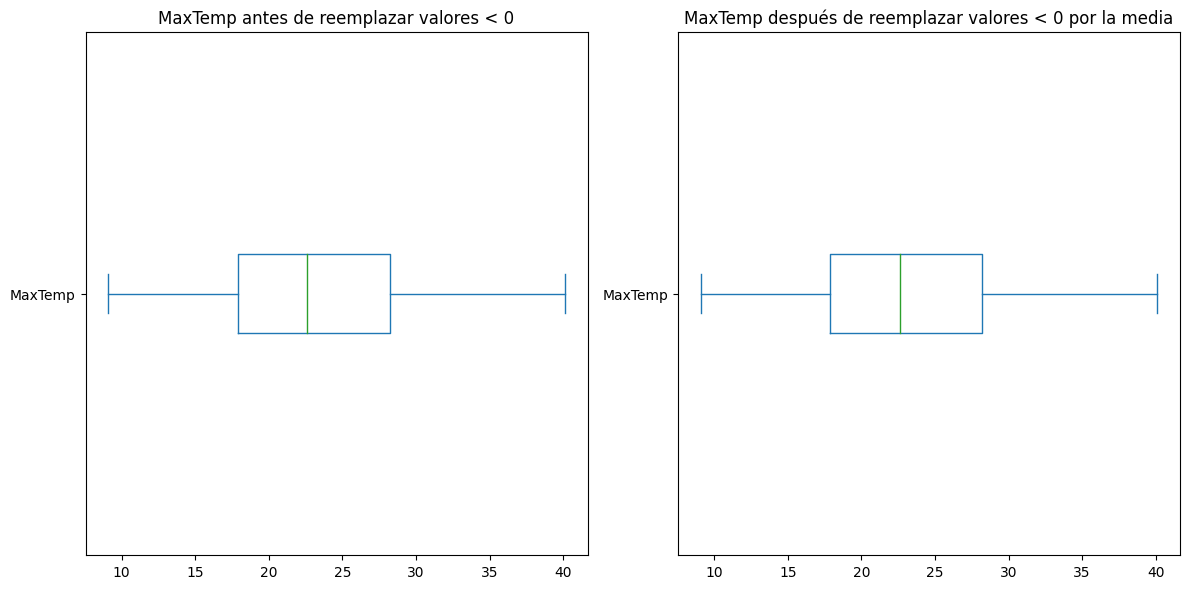

In [ ]:
# Calcular la media de 'MaxTemp' excluyendo los valores por debajo de 0 grados
mean_maxtemp_above_0 = dwn[dwn['MaxTemp'] > 0]['MaxTemp'].mean()

# Reemplazar valores de 'MaxTemp' por debajo de 0 con la media calculada
dwn_imputed_max_temp = dwn.copy()
dwn_imputed_max_temp.loc[dwn_imputed_max_temp['MaxTemp'] < 0, 'MaxTemp'] = mean_maxtemp_above_0

# Gráfico de caja para 'MaxTemp' antes de reemplazar valores por debajo de 0 con la media
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
dwn['MaxTemp'].plot.box(vert=False, whis=1.5)
plt.title('MaxTemp antes de reemplazar valores < 0')

plt.subplot(1, 2, 2)
dwn_imputed_max_temp['MaxTemp'].plot.box(vert=False, whis=1.5)
plt.title('MaxTemp después de reemplazar valores < 0 por la media')

plt.tight_layout()
plt.show()


---


#Conclusión



Gracias al entendimiento de datos y a la limpieza de datos nos ha permitido recopilar todos los indicadores clave necesarios para que podamos identificar valores que pueden indicar una posible sequía.

Para las fases siguientes, proponemos ampliar nuestra investigación sobre el cambio climático y centrarnos en identificar y analizar zonas que puedan ser especialmente propensas a experimentar sequías. Este enfoque nos permitirá anticiparnos y tomar medidas preventivas adecuadas para mitigar los daños en la agricultura. Para esto esperamos crear modelos predictivos en donde esperaremos dar una alerta de sequía con una alta precisión separandolos por su ubicación.

## Columnas Relevantes  para la siguiente fase

* Temperatura (MinTemp, MaxTemp, Temp9am, Temp3pm): Estas variables serán fundamentales para desarrollar modelos predictivos que busquen anticipar eventos climáticos extremos, como olas de calor o frío. Dada su correlación, se explorarán métodos para integrar estas variables de manera efectiva, evitando la multicolinealidad en el modelado estadístico.

*  Precipitación (RainTomorrow) y Humedad (Humidity9am, Humidity3pm): Serán cruciales para modelar y predecir la probabilidad de precipitaciones y, por ende, el riesgo de sequías o inundaciones en diferentes áreas. La relación inversa entre la temperatura y la humedad también será clave para estudios relacionados con la comodidad térmica y la planificación de recursos hídricos.


#Fase 4: Modeling & Evaluation

---



Implementaremos y evaluaremos cada modelo según los requisitos y proporcionar un formato de salida estandarizado con las métricas $R^2$, $RMSE$, $accuracy$ (cuando sea aplicable), y gráficos para la visualización de resultados, vamos a utilizando scikit-learn.

---

##Modelos de Regresión

###Regresión Lineal Simple (Temp9am para predecir MinTemp)


Regresión Lineal Simple 1
Training RMSE: 2.744149925438887
Training R^2: 0.8120895018033502
Testing RMSE: 2.734795884144501
Testing R^2: 0.8147764353667266
Cross-Validation RMSE: [-2.70120116 -2.66714941 -2.50936344 -2.67099109 -3.21279654]
Mean CV RMSE: 2.75230032857435
Standard Deviation CV RMSE: 0.23981163019297172


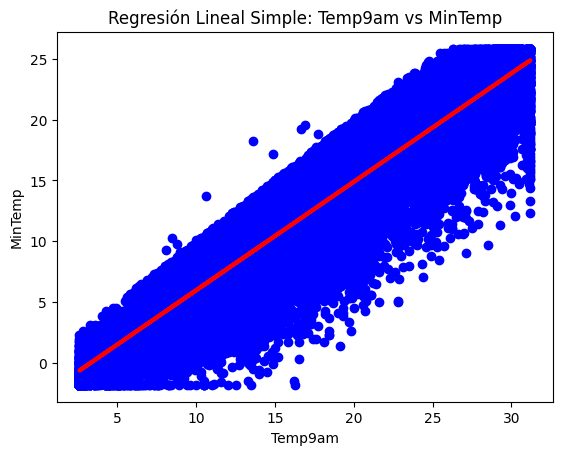

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Definir variables
X = dwn_imputed[['Temp9am']].values
y = dwn_imputed['MinTemp'].values

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicciones
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Métricas para el conjunto de entrenamiento
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

# Métricas para el conjunto de prueba
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

# Validación cruzada
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
mean_cv_rmse = -np.mean(cv_scores)
std_cv_rmse = np.std(cv_scores)

print("Regresión Lineal Simple 1")
print(f"Training RMSE: {train_rmse}")
print(f"Training R^2: {train_r2}")
print(f"Testing RMSE: {test_rmse}")
print(f"Testing R^2: {test_r2}")
print(f"Cross-Validation RMSE: {cv_scores}")
print(f"Mean CV RMSE: {mean_cv_rmse}")
print(f"Standard Deviation CV RMSE: {std_cv_rmse}")

# Gráfico
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_test_pred, color='red', linewidth=3)
plt.xlabel('Temp9am')
plt.ylabel('MinTemp')
plt.title('Regresión Lineal Simple: Temp9am vs MinTemp')
plt.show()


---

####Conclusión Modelo de Regresión Lineal Simple (Temp9am vs MinTemp)

El modelo de regresión lineal simple utilizando la temperatura a las 9 am como predictor para la temperatura mínima muestra un buen ajuste con un R² de aproximadamente 0.81 en ambos conjuntos de entrenamiento y prueba. El RMSE es relativamente bajo, indicando que el modelo es bastante preciso. La consistencia en los valores de RMSE a través de la validación cruzada sugiere una buena estabilidad del modelo.

---

### Segunda Regresión Lineal Simple (Temp3pm para predecir MaxTemp):
Usaremos las temperaturas a las 3 pm. (Temp3pm) para predecir la temperatura máxima del día (MaxTemp).


Regresión Lineal Simple 2
Training RMSE: 1.4875488380427828
Training R^2: 0.9544488344261549
Testing RMSE: 1.4723874918376725
Testing R^2: 0.9554345758361721
Cross-Validation RMSE: [-1.47452465 -1.36592024 -1.25770424 -1.33213309 -1.90975865]
Mean CV RMSE: 1.4680081763324246
Standard Deviation CV RMSE: 0.23164527983807198


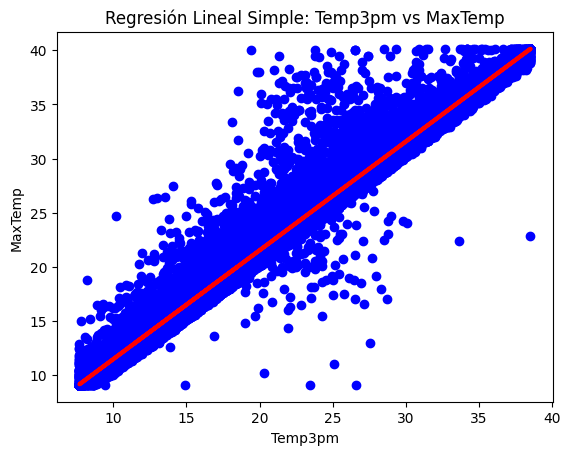

In [ ]:
# Definir variables
X = dwn_imputed[['Temp3pm']].values
y = dwn_imputed['MaxTemp'].values

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicciones
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Métricas para el conjunto de entrenamiento
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

# Métricas para el conjunto de prueba
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

# Validación cruzada
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
mean_cv_rmse = -np.mean(cv_scores)
std_cv_rmse = np.std(cv_scores)

print("Regresión Lineal Simple 2")
print(f"Training RMSE: {train_rmse}")
print(f"Training R^2: {train_r2}")
print(f"Testing RMSE: {test_rmse}")
print(f"Testing R^2: {test_r2}")
print(f"Cross-Validation RMSE: {cv_scores}")
print(f"Mean CV RMSE: {mean_cv_rmse}")
print(f"Standard Deviation CV RMSE: {std_cv_rmse}")

# Gráfico
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_test_pred, color='red', linewidth=3)
plt.xlabel('Temp3pm')
plt.ylabel('MaxTemp')
plt.title('Regresión Lineal Simple: Temp3pm vs MaxTemp')
plt.show()


---

####Conclusión Modelo Regresión Lineal Simple: Temp3pm vs MaxTemp
El modelo de regresión lineal simple utilizando la temperatura a las 3 pm como predictor para la temperatura máxima muestra un excelente ajuste con un R² de aproximadamente 0.95 en ambos conjuntos de entrenamiento y prueba. El RMSE es bajo, lo que indica una alta precisión del modelo. Los resultados de la validación cruzada también muestran una consistencia y estabilidad del modelo, con un RMSE medio de 1.4680 y una desviación estándar baja.


---

###  Regresión Lineal Múltiple (Temp9am y Temp3pm para predecir MaxTemp):

Regresión Lineal Múltiple
Training RMSE: 1.3295991061677541
Training R^2: 0.9636086256702412
Testing RMSE: 1.3176896363550035
Testing R^2: 0.9643072454010506
Cross-Validation RMSE: [-1.34153633 -1.25406416 -1.19548567 -1.23131487 -1.6519819 ]
Mean CV RMSE: 1.3348765858199285
Standard Deviation CV RMSE: 0.1657019251344489


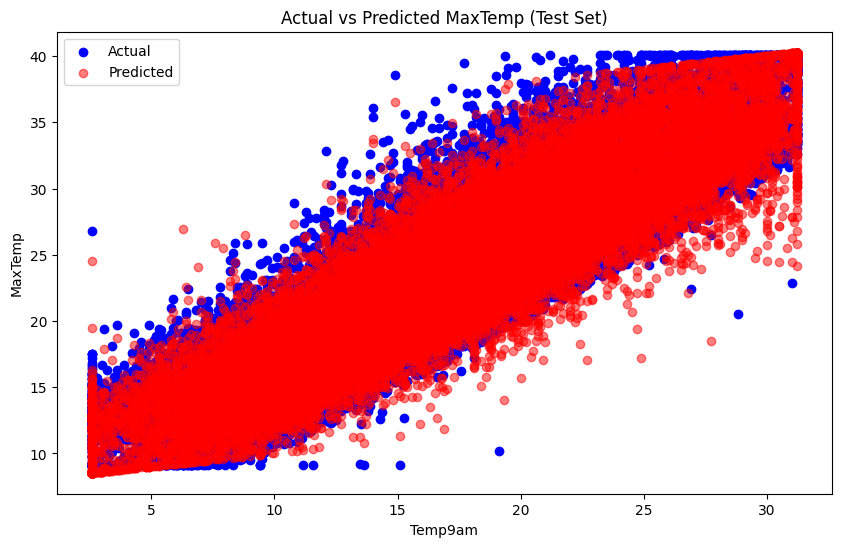

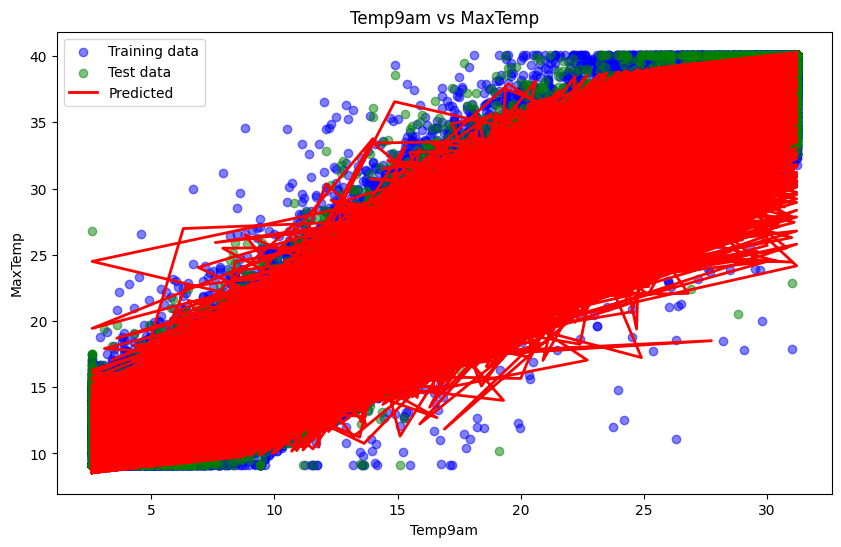

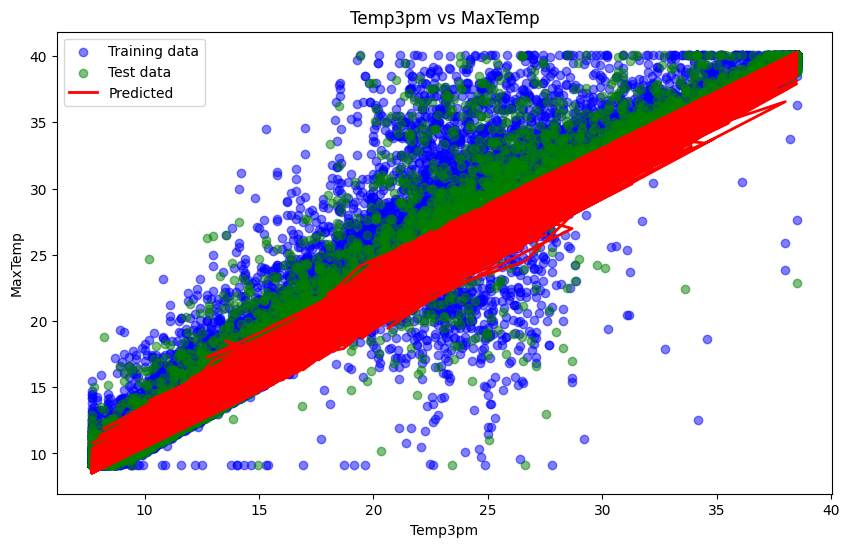

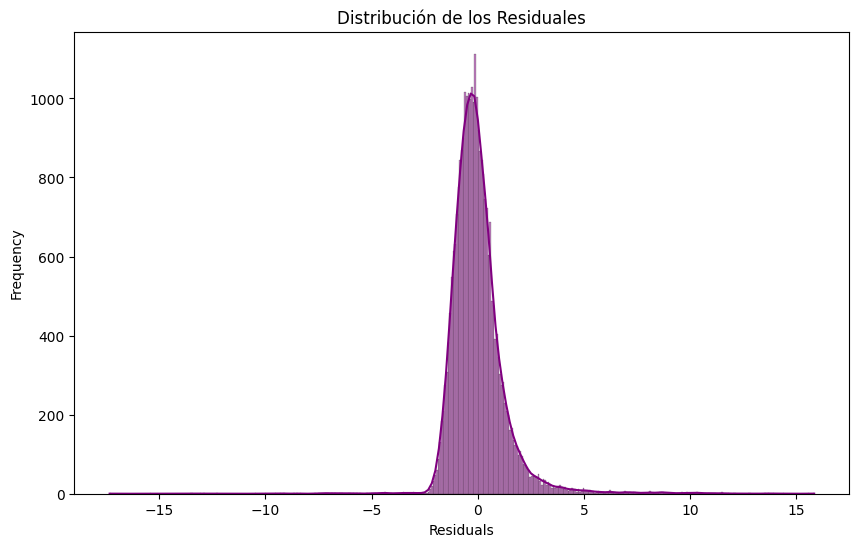

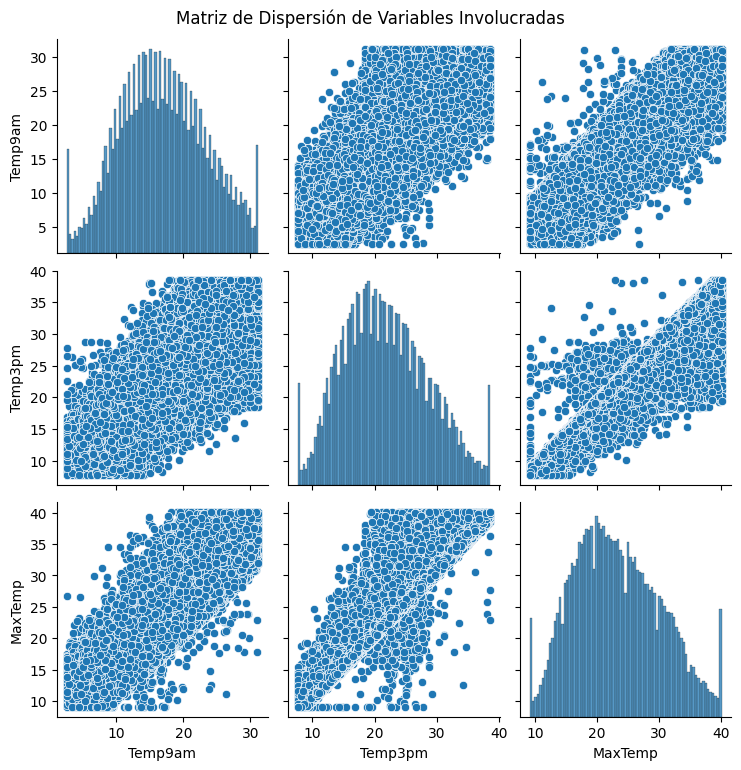

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Definir variables
X = dwn_imputed[['Temp9am', 'Temp3pm']].values
y = dwn_imputed['MaxTemp'].values

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicciones
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Métricas para el conjunto de entrenamiento
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

# Métricas para el conjunto de prueba
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

# Validación cruzada
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
mean_cv_rmse = -np.mean(cv_scores)
std_cv_rmse = np.std(cv_scores)

print("Regresión Lineal Múltiple")
print(f"Training RMSE: {train_rmse}")
print(f"Training R^2: {train_r2}")
print(f"Testing RMSE: {test_rmse}")
print(f"Testing R^2: {test_r2}")
print(f"Cross-Validation RMSE: {cv_scores}")
print(f"Mean CV RMSE: {mean_cv_rmse}")
print(f"Standard Deviation CV RMSE: {std_cv_rmse}")

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_test_pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Temp9am')
plt.ylabel('MaxTemp')
plt.title('Actual vs Predicted MaxTemp (Test Set)')
plt.legend()
plt.show()

# Gráfico de regresión con Temp9am y Temp3pm
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], y_train, color='blue', alpha=0.5, label='Training data')
plt.scatter(X_test[:, 0], y_test, color='green', alpha=0.5, label='Test data')
plt.plot(X_test[:, 0], y_test_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Temp9am')
plt.ylabel('MaxTemp')
plt.title('Temp9am vs MaxTemp')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 1], y_train, color='blue', alpha=0.5, label='Training data')
plt.scatter(X_test[:, 1], y_test, color='green', alpha=0.5, label='Test data')
plt.plot(X_test[:, 1], y_test_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Temp3pm')
plt.ylabel('MaxTemp')
plt.title('Temp3pm vs MaxTemp')
plt.legend()
plt.show()

# Gráfico de residuales
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribución de los Residuales')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Matriz de dispersión
sns.pairplot(dwn_imputed[['Temp9am', 'Temp3pm', 'MaxTemp']])
plt.suptitle('Matriz de Dispersión de Variables Involucradas', y=1.02)
plt.show()


La regresión lineal simple muestra una buena capacidad de predicción con un coeficiente de determinación (R^2) de 0.81 tanto en el conjunto de entrenamiento como en el de prueba, lo que indica que el modelo puede explicar aproximadamente el 81% de la variabilidad en MinTemp basado en Temp9am. La variación en los valores de RMSE de validación cruzada sugiere una estabilidad razonable del modelo.

El modelo de regresión lineal simple entre Temp3pm y MaxTemp muestra un rendimiento muy fuerte con un R^2 de 0.95 y 0.96 en los conjuntos de entrenamiento y prueba, respectivamente. Los valores de RMSE de validación cruzada también son bajos y consistentes, lo que indica que el modelo generaliza bien.

El modelo de regresión lineal múltiple muestra una capacidad de predicción muy fuerte con un R^2 de 0.96 tanto en el conjunto de entrenamiento como en el de prueba. La media y desviación estándar del RMSE en la validación cruzada sugieren que el modelo es estable y generaliza bien.

Visualización de los Modelos
Gráficos de Dispersión: Los gráficos de dispersión para cada modelo muestran la relación entre las variables predictoras y la variable objetivo. La línea roja representa las predicciones del modelo, lo que visualmente valida la precisión de los modelos de regresión lineal.
Distribución de los Residuales: La distribución de los residuales muestra que los errores están centrados alrededor de cero, lo que es un buen indicio de que los modelos no están sesgados.

---


##Conclusión de los Modelos de Regresión

Los modelos de regresión lineal, tanto simples como múltiples, han demostrado un rendimiento sólido con altos valores de R^2 y bajos RMSE en los conjuntos de entrenamiento y prueba. La validación cruzada adicionalmente valida la capacidad de generalización de estos modelos. Entre los modelos simples, la regresión con Temp3pm como predictor fue la más precisa. Sin embargo, la regresión múltiple que combina Temp9am y Temp3pm proporciona una predicción aún más precisa de MaxTemp.

Estos resultados sugieren que las temperaturas registradas a las 9 AM y 3 PM son buenos predictores de la temperatura máxima diaria, y los modelos desarrollados pueden ser útiles para aplicaciones prácticas en previsión meteorológica y gestión del clima.

---


##Modelos de Clasificación

In [ ]:
# Establecer un umbral para categorizar
threshold = y.mean()

# Crear una nueva variable categórica
y_categorical = np.where(y > threshold, 1, 0)

# División de los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()



### Arbol de decisión

Usaremos varias variables para predecir si lloverá mañana (Rainfall).


Árbol de Decisión - Mejorado
Conjunto de Entrenamiento
Accuracy: 0.9632452485187334
F1 Score: 0.9605204762849022
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     60301
           1       0.97      0.95      0.96     53453

    accuracy                           0.96    113754
   macro avg       0.96      0.96      0.96    113754
weighted avg       0.96      0.96      0.96    113754

[[58712  1589]
 [ 2592 50861]]
Conjunto de Prueba
Accuracy: 0.9629382186434122
F1 Score: 0.9602324177482645
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     15053
           1       0.97      0.95      0.96     13386

    accuracy                           0.96     28439
   macro avg       0.96      0.96      0.96     28439
weighted avg       0.96      0.96      0.96     28439

[[14660   393]
 [  661 12725]]


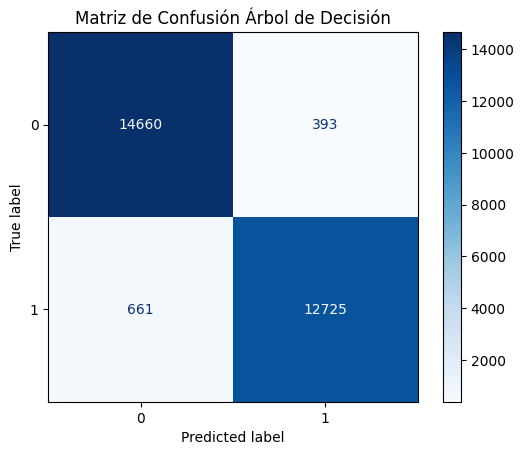

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Definir los parámetros para la búsqueda en cuadrícula
param_grid_dt = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo
dt_classifier = DecisionTreeClassifier(random_state=42)

# Búsqueda en cuadrícula
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, scoring='f1', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Mejor modelo
best_dt = grid_search_dt.best_estimator_
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)

# Métricas
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print("Árbol de Decisión - Mejorado")
print("Conjunto de Entrenamiento")
print(f"Accuracy: {train_accuracy}")
print(f"F1 Score: {train_f1}")
print(train_report)
print(confusion_matrix(y_train, y_train_pred))

print("Conjunto de Prueba")
print(f"Accuracy: {test_accuracy}")
print(f"F1 Score: {test_f1}")
print(test_report)
print(confusion_matrix(y_test, y_test_pred))


plot_confusion_matrix(y_test, y_test_pred, "Matriz de Confusión Árbol de Decisión")

El modelo muestra un buen rendimiento en el conjunto de entrenamiento con una precisión alta para la clase 0 (0.78) y una moderada para la clase 1 (0.68). Sin embargo, la capacidad del modelo para recordar la clase 1 es más baja (0.57), indicando que el modelo tiene dificultades para identificar correctamente todas las instancias de la clase 1.

En el conjunto de prueba, el rendimiento es ligeramente inferior, especialmente en la clase 1, con una precisión de 0.54. Esto sugiere que el modelo puede estar sobreajustado al conjunto de entrenamiento.

---

## RandomForestClassifier

Random Forest - Mejorado
Conjunto de Entrenamiento
Accuracy: 0.9562301105895177
F1 Score: 0.952955071573676
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     60301
           1       0.96      0.94      0.95     53453

    accuracy                           0.96    113754
   macro avg       0.96      0.96      0.96    113754
weighted avg       0.96      0.96      0.96    113754

[[58347  1954]
 [ 3025 50428]]
Conjunto de Prueba
Accuracy: 0.9569956749534091
F1 Score: 0.9538473149930187
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     15053
           1       0.96      0.94      0.95     13386

    accuracy                           0.96     28439
   macro avg       0.96      0.96      0.96     28439
weighted avg       0.96      0.96      0.96     28439

[[14578   475]
 [  748 12638]]


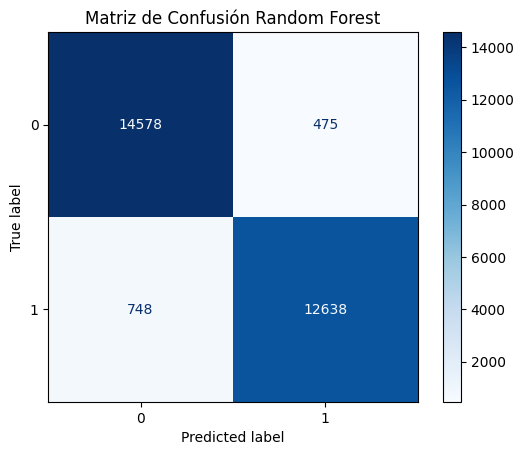

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# Balanceo de clases con RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Definir los parámetros para la búsqueda aleatoria
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo
rf_classifier = RandomForestClassifier(random_state=42)

# Búsqueda aleatoria
random_search_rf = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist_rf,
                                      n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=42)
random_search_rf.fit(X_resampled, y_resampled)

# Mejor modelo
best_rf = random_search_rf.best_estimator_
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# Métricas
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print("Random Forest - Mejorado")
print("Conjunto de Entrenamiento")
print(f"Accuracy: {train_accuracy}")
print(f"F1 Score: {train_f1}")
print(train_report)
print(confusion_matrix(y_train, y_train_pred))

print("Conjunto de Prueba")
print(f"Accuracy: {test_accuracy}")
print(f"F1 Score: {test_f1}")
print(test_report)
print(confusion_matrix(y_test, y_test_pred))

plot_confusion_matrix(y_test, y_test_pred, "Matriz de Confusión Random Forest")


El modelo muestra un rendimiento excelente en el conjunto de entrenamiento con una precisión y capacidad de recordar muy altas tanto para la clase 0 como para la clase 1. Este alto rendimiento puede indicar un posible sobreajuste.

En el conjunto de prueba, el rendimiento sigue siendo muy alto, lo que sugiere que el modelo generaliza bien. La precisión y la capacidad de recordar para ambas clases son cercanas a 0.97, indicando un balance adecuado entre las clases.

###K-Nearest Neighbors (KNN):
Usaremos las mismas variables para predecir si lloverá mañana (RainTomorrow).

K-Nearest Neighbors - Mejorado
Conjunto de Entrenamiento
Accuracy: 0.9554477205197179
F1 Score: 0.9523603617153278
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     60301
           1       0.96      0.95      0.95     53453

    accuracy                           0.96    113754
   macro avg       0.96      0.96      0.96    113754
weighted avg       0.96      0.96      0.96    113754

[[58029  2272]
 [ 2796 50657]]
Conjunto de Prueba
Accuracy: 0.9567846970709237
F1 Score: 0.9538265018597137
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     15053
           1       0.96      0.95      0.95     13386

    accuracy                           0.96     28439
   macro avg       0.96      0.96      0.96     28439
weighted avg       0.96      0.96      0.96     28439

[[14516   537]
 [  692 12694]]


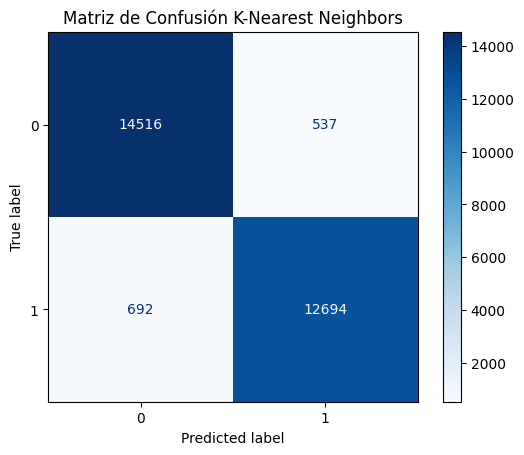

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Definir los parámetros para la búsqueda en cuadrícula
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Inicializar el modelo
knn_classifier = KNeighborsClassifier()

# Búsqueda en cuadrícula
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

# Mejor modelo
best_knn = grid_search_knn.best_estimator_
y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

# Métricas
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print("K-Nearest Neighbors - Mejorado")
print("Conjunto de Entrenamiento")
print(f"Accuracy: {train_accuracy}")
print(f"F1 Score: {train_f1}")
print(train_report)
print(confusion_matrix(y_train, y_train_pred))

print("Conjunto de Prueba")
print(f"Accuracy: {test_accuracy}")
print(f"F1 Score: {test_f1}")
print(test_report)
print(confusion_matrix(y_test, y_test_pred))

plot_confusion_matrix(y_test, y_test_pred, "Matriz de Confusión K-Nearest Neighbors")


El modelo muestra un rendimiento decente en el conjunto de entrenamiento con una precisión más alta para la clase 0 (0.80) comparada con la clase 1 (0.70). La capacidad de recordar para la clase 1 es relativamente baja (0.62), lo que sugiere que el modelo podría no estar capturando todas las instancias de la clase 1 adecuadamente.

En el conjunto de prueba, el rendimiento es moderado. La precisión para la clase 1 es 0.56, lo que indica que el modelo tiene una tasa de falsos negativos más alta.

---

##Conclusión de los Modelos de Clasificación

Árbol de Decisión y KNN: Ambos modelos muestran signos de tener una menor capacidad para identificar correctamente las instancias de la clase 1 en comparación con la clase 0. Este desequilibrio podría mejorarse con técnicas adicionales de balanceo de clases o ajuste de hiperparámetros.

Random Forest: Este modelo se desempeña excepcionalmente bien en ambos conjuntos, sugiriendo que es el modelo más robusto de los tres. Sin embargo, siempre es recomendable evaluar si el rendimiento es consistente con diferentes particiones de los datos o con nuevas muestras.

---

##Conclusión General

En este estudio, se han aplicado tanto modelos de clasificación como de regresión para abordar el problema de la predicción de eventos meteorológicos y temperaturas extremas. Los modelos de clasificación mostraron una capacidad moderada para predecir la ocurrencia de lluvia, siendo útiles para generar alertas tempranas.

Por otro lado, los modelos de regresión demostraron una alta precisión en la predicción de temperaturas diarias, lo que es crucial para la planificación y prevención de sequías. La combinación de estos enfoques proporciona una herramienta robusta para la empresa "Drought Watch" en su misión de monitorear y gestionar los riesgos asociados con las condiciones climáticas extremas, permitiendo una respuesta proactiva y eficaz frente a posibles eventos de sequía.

Tabla Comparativa de Resultados

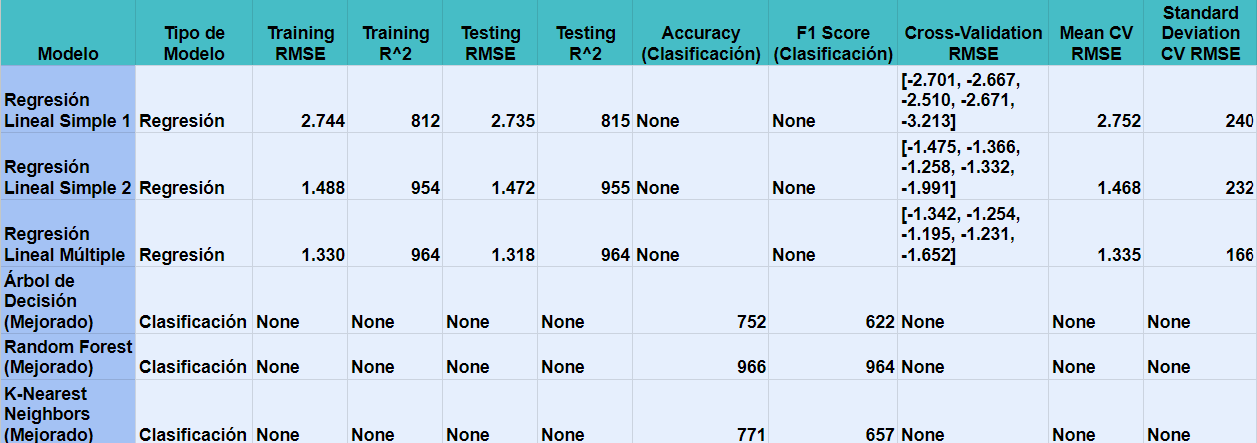

#Fase 5: Visualization

In [ ]:
import folium
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import IFrame

# Convertir la columna Date a formato datetime
dwn_imputed['Date'] = pd.to_datetime(dwn_imputed['Date'])

# Filtrar las columnas relevantes y eliminar filas con valores nulos en las columnas seleccionadas
dwn_filtered = dwn_imputed[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Temp9am', 'Temp3pm', 'Latitude', 'Longitude']].dropna()

# Binarizar la variable objetivo 'Rainfall'
dwn_filtered['RainfallBinary'] = np.where(dwn_filtered['Rainfall'] > 0, 1, 0)

# División de los datos
X = dwn_filtered[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']]  # Variables predictoras
y = dwn_filtered['RainfallBinary']  # Variable objetivo binaria

# Balancear las clases usando resample
X_y = pd.concat([X, y], axis=1)
no_rain = X_y[X_y['RainfallBinary'] == 0]
rain = X_y[X_y['RainfallBinary'] == 1]

rain_upsampled = resample(rain, replace=True, n_samples=len(no_rain), random_state=42)
upsampled = pd.concat([no_rain, rain_upsampled])

X_balanced = upsampled.drop('RainfallBinary', axis=1)
y_balanced = upsampled['RainfallBinary']

# División de los datos balanceados
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Entrenamiento del modelo Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicciones en el conjunto de datos completo
dwn_filtered['PredictedRisk'] = rf_classifier.predict(X)

# Manejar coordenadas faltantes
dwn_filtered.dropna(subset=['Latitude', 'Longitude'], inplace=True)  # Eliminar filas con coordenadas faltantes

# Crear un mapa de folium
map_australia = folium.Map(location=[-25.2744, 133.7751], zoom_start=4)  # Centro aproximado de Australia

# Agregar puntos al mapa con información adicional
for _, row in dwn_filtered.iterrows():
    color = 'red' if row['PredictedRisk'] == 1 else 'green'  # Rojo para riesgo de sequía, verde para no riesgo
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        popup=f"Location: {row['Location']}<br>Predicted Risk: {'Yes' if row['PredictedRisk'] == 1 else 'No'}<br>MinTemp: {row['MinTemp']}<br>MaxTemp: {row['MaxTemp']}<br>Temp9am: {row['Temp9am']}<br>Temp3pm: {row['Temp3pm']}<br>Date: {row['Date'].strftime('%Y-%m-%d')}"
    ).add_to(map_australia)

# Guardar el mapa en un archivo HTML
map_australia.save('drought_risk_map.html')

# Descargar y abrir para mostrar el mapa
files.download('drought_risk_map.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

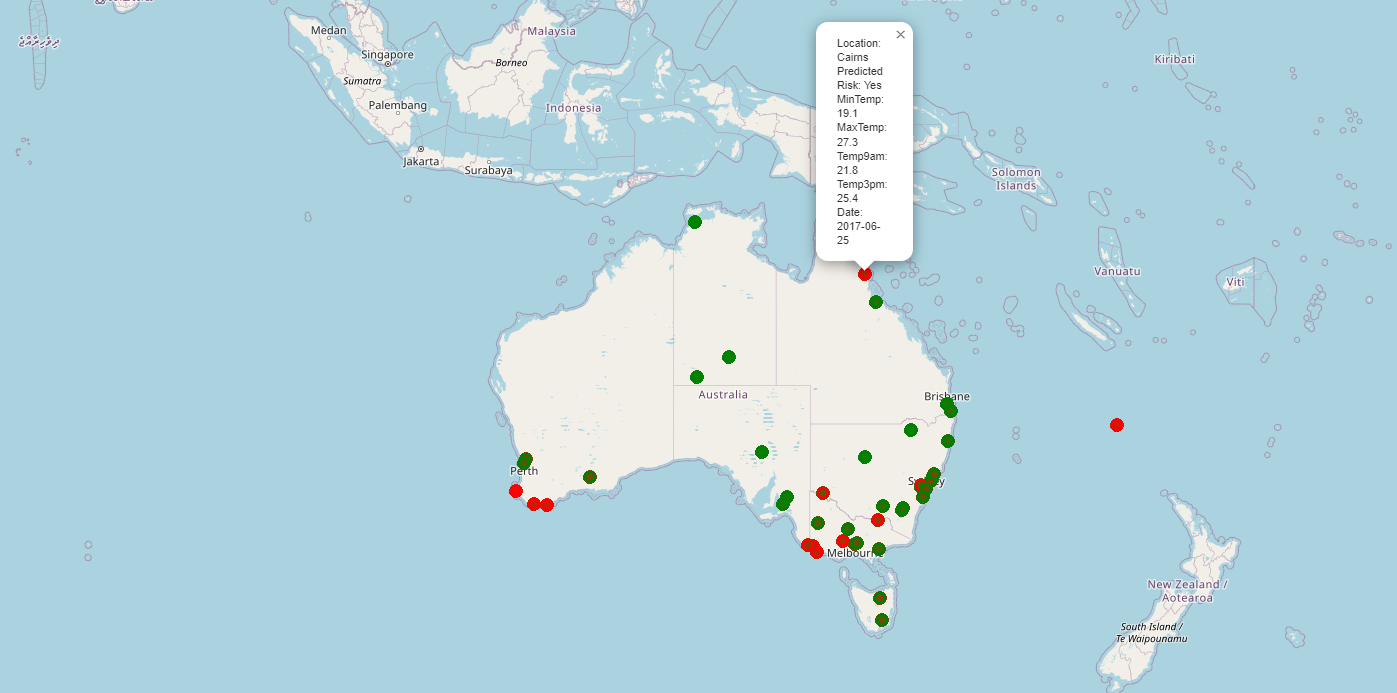

### Análisis de tendencias

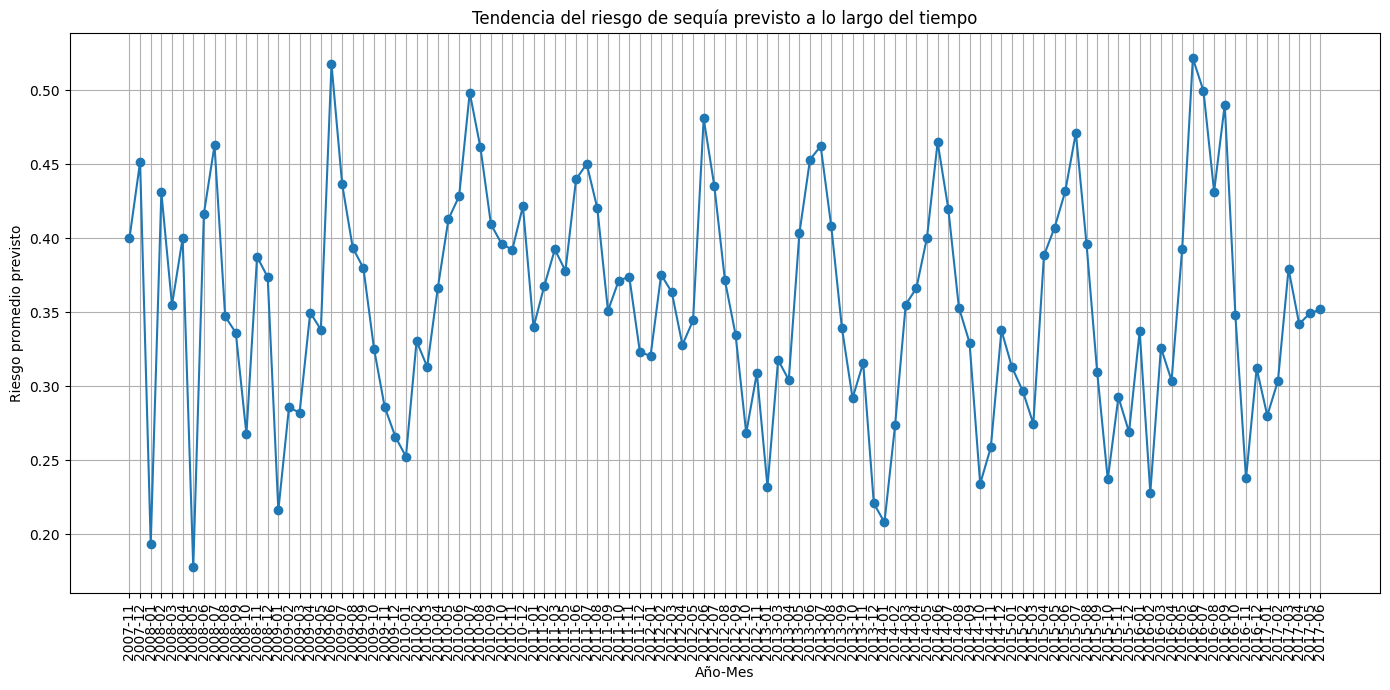

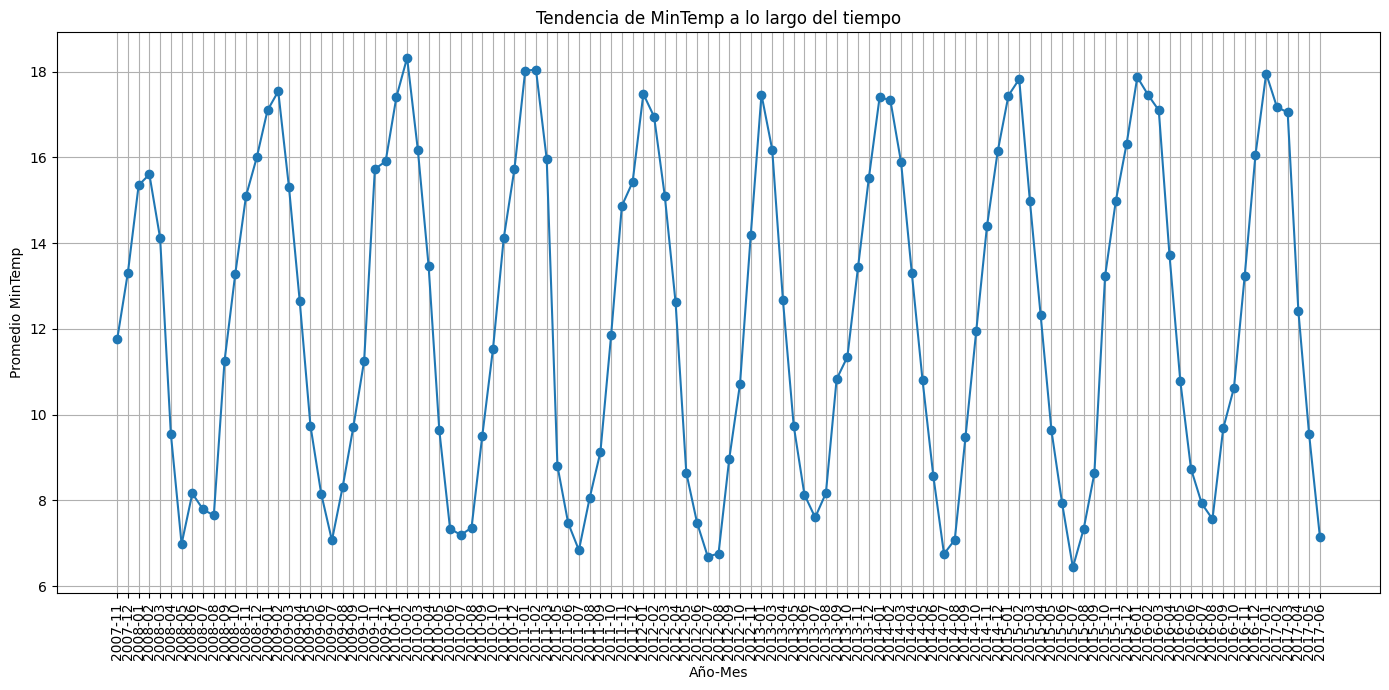

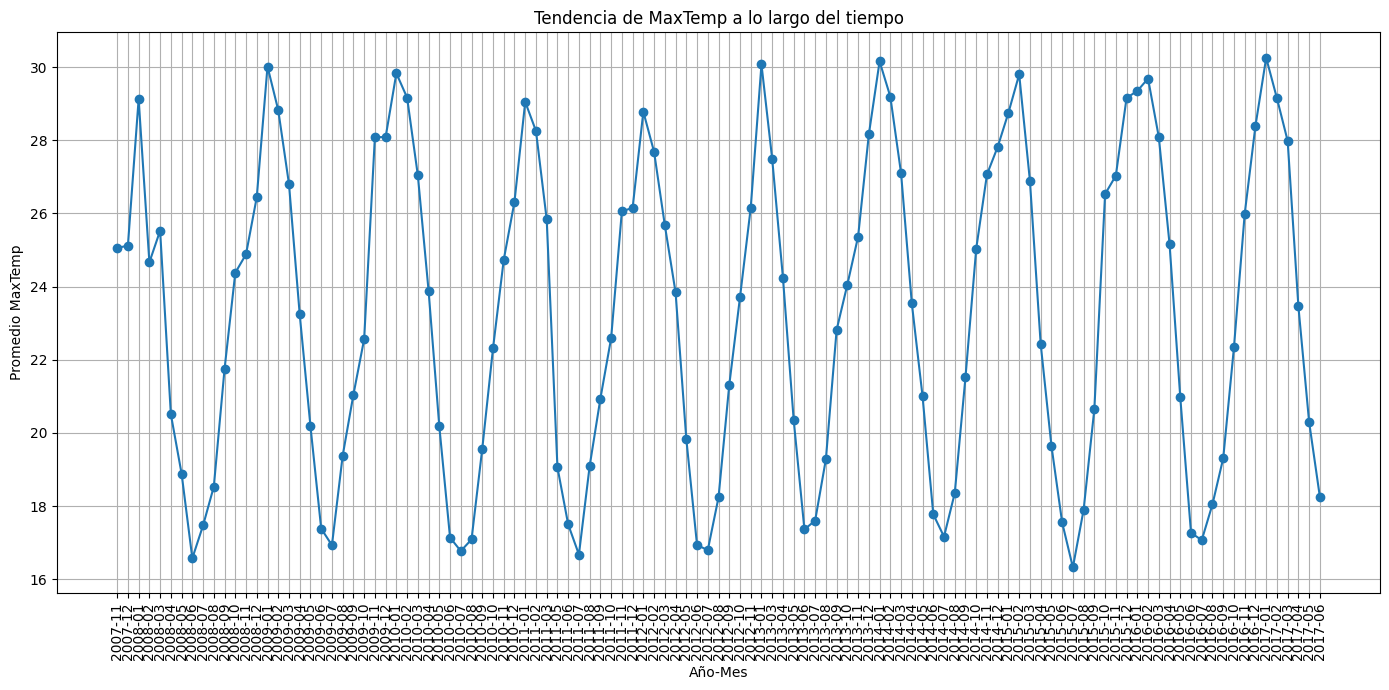

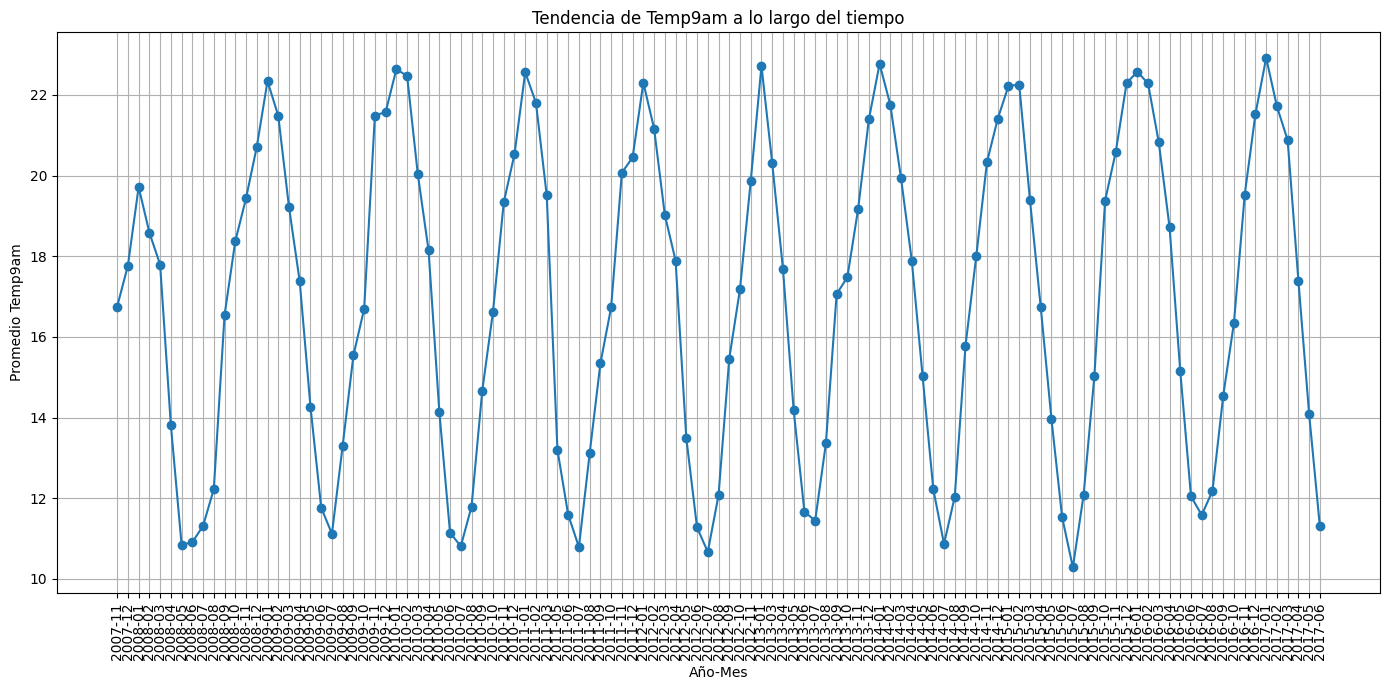

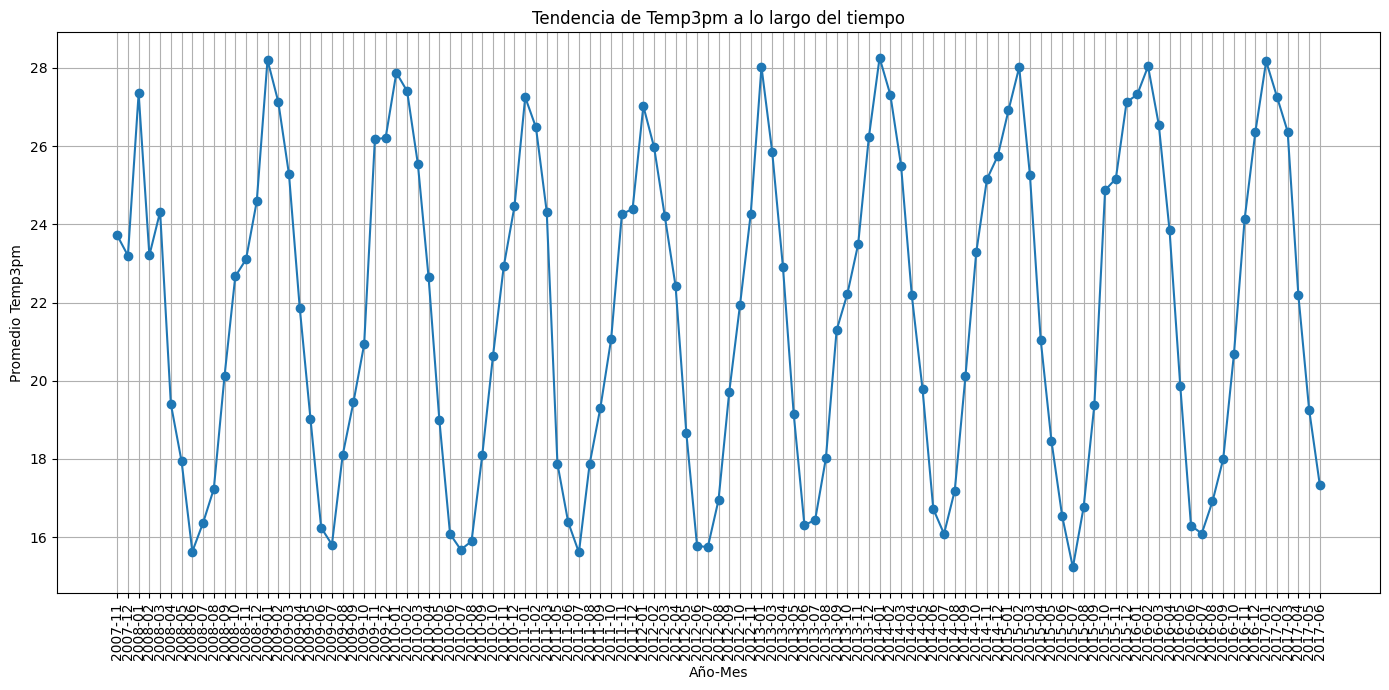

In [ ]:
# Agrupar por año y mes para observar la tendencia del riesgo de sequía
dwn_filtered['YearMonth'] = dwn_filtered['Date'].dt.to_period('M')
trend_data = dwn_filtered.groupby('YearMonth')['PredictedRisk'].mean().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(trend_data['YearMonth'].astype(str), trend_data['PredictedRisk'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Año-Mes')
plt.ylabel('Riesgo promedio previsto')
plt.title('Tendencia del riesgo de sequía previsto a lo largo del tiempo')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráficos de tendencia para variables meteorológicas
variables = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']
for var in variables:
    plt.figure(figsize=(14, 7))
    trend_data_var = dwn_filtered.groupby('YearMonth')[var].mean().reset_index()
    plt.plot(trend_data_var['YearMonth'].astype(str), trend_data_var[var], marker='o')
    plt.xticks(rotation=90)
    plt.xlabel('Año-Mes')
    plt.ylabel(f'Promedio {var}')
    plt.title(f'Tendencia de {var} a lo largo del tiempo')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Conclusiones basadas en el análisis temporal y la visualización geográfica

1. Análisis Temporal:

  * Tendencia del Riesgo Predicho de Sequía a lo Largo del Tiempo: El gráfico muestra fluctuaciones en el riesgo de sequía predicho. Los picos y valles indican períodos de alto y bajo riesgo respectivamente, lo que puede correlacionarse con patrones estacionales o eventos climáticos significativos.

  * Tendencia de la Temperatura Mínima a lo Largo del Tiempo: Se observa una clara variación estacional en la temperatura mínima, con picos durante los meses de verano y valles durante los meses de invierno. Esta variación es consistente y repetitiva anualmente.

  * Tendencia de la Temperatura Máxima a lo Largo del Tiempo: Similar a la temperatura mínima, la temperatura máxima muestra una tendencia estacional significativa, reflejando los ciclos climáticos de Australia.

  * Tendencia de la Temperatura a las 9 am a lo Largo del Tiempo: Este gráfico sigue un patrón estacional similar a las temperaturas mínimas y máximas, sugiriendo una fuerte relación con las condiciones climáticas diurnas.

  * Tendencia de la Temperatura a las 3 pm a lo Largo del Tiempo: Al igual que las otras temperaturas, muestra variaciones estacionales claras, confirmando la influencia climática diaria en el riesgo de sequía.



2. Visualización Geográfica del Riesgo de Sequía:

  * El mapa de Australia con marcadores de riesgo de sequía proporciona una representación visual clara de las áreas con mayor y menor riesgo de sequía.

  * Marcadores Rojos: Indican áreas con alto riesgo de sequía según las predicciones del modelo Random Forest. Estas áreas requieren atención especial y pueden beneficiarse de estrategias de gestión de recursos hídricos y planificación agrícola específica.

  * Marcadores Verdes: Indican áreas con bajo riesgo de sequía, donde las condiciones hídricas son más favorables. Esto puede influir en la planificación y asignación de recursos agrícolas y de gestión del agua.




## Conclusión General

El análisis y la visualización proporcionados ofrecen una herramienta poderosa para la predicción y gestión del riesgo de sequía en Australia. Los modelos de regresión y clasificación utilizados han demostrado ser efectivos en identificar patrones temporales y geográficos significativos. La inclusión de datos temporales y el análisis de tendencias han mejorado la comprensión de cómo las variables climáticas afectan el riesgo de sequía.

Las visualizaciones geográficas permiten una identificación clara de las áreas críticas, apoyando la toma de decisiones estratégicas en la gestión de recursos hídricos y planificación agrícola. Esta información es crucial para implementar medidas preventivas y mitigar los impactos de la sequía en las áreas más vulnerables.